# **Latar Belakang**

Seorang Data Scientis sebuah perusahaan Online Marketplace, ingin memahami perilaku pelanggan dengan menganalisis kepribadian/perilaku belanja dari para pelanggan. Tujuan analisis ini adalah agar perusahaan dapat melakukan campaign yang tepat berdasarkan analisis segmen pelanggan mana yang paling memungkinakan membeli suatu produk, sehingga promosi yang yang diberikan perusahaan tepat sasaran.


# **Pernyataan Masalah**

Perusahaan ingin mengetahui:
* **produk apa yang paling sering dibeli berdasarkan segmen usia**
* **produk apa yang paling sering dibeli berdasarkan segmen marital status dan jumlah anak yang dimiliki**
* **bulan apa yang mengalami penurunan pembelian**
* **tanggal berapa yang mengalami peningkatan dan penurunan pembelian**
* **penjualan mana yang paling sering dilakukan, baik melalui website, toko, maupun katalog**

Informasi berikut diharapkan dapat membantu perusahaan untuk mengurangi cost campaing dan meningkatkan penjualan dengan memberikan promo yang tepat.
 
Hal yang pertama kali dilakukan adalah mengetahui **Bagaimana karakteristik pembeli yang berdasarkan status keluarga dan usia**

### Keterangan Masing-Masing Kolom:
Terdapat 29 kolom yang masing-masing kolom berisikan informasi sebagai berikut:

**Data Pelanggan:**
* ID: - Kode Unik/ID Pelanggan
* Year_Birth: Tahun lahir pelanggan
* Education: Level edukasi pelanggan
* Marital_Status: Status pernikahan pelanggan
* Income: Penghasilan tahunan pelanggan
* Kidhome: Jumlah Anak dalam satu rumah
* Teenhome: Jumlah Anak dalam satu rumah
* Dt_Customer: Tanggal pelanggan pertama kali memakai aplikasi/situs belanja
* Recency: Jumlah hari setelah pembelian terakhir
* Complain: 1 apabila customer pernah complain selama 2 tahun terakhir, 0 tidak pernah

**Produk:**
* MntWines: Total pembelian Wine selama 2 tahun terakhir
* MntFruits: Total pembelian Buah selama 2 tahun terakhir
* MntMeatProducts: Total pembelian produk Daging selama 2 tahun terakhir
* MntFishProducts: Total pembelian Ikan selama 2 tahun terakhir
* MntSweetProducts: Total pembelian produk manis selama 2 tahun terakhir
* MntGoldProds: Total pembelian Emas selama 2 tahun terakhir

**Promosi**
* NumDealsPurchases: Pembelian yang dilakukan dengan diskon
* AcceptedCmp1: 1 apabila pelanggan menerima tawaran diskon pada campaign pertama, 0 tidak
* AcceptedCmp2: 1 apabila pelanggan menerima tawaran diskon pada campaign kedua, 0 tidak
* AcceptedCmp3: 1 apabila pelanggan menerima tawaran diskon pada campaign ketiga, 0 tidak
* AcceptedCmp4: 1 apabila pelanggan menerima tawaran diskon pada campaign keempat, 0 tidak
* AcceptedCmp5: 1 apabila pelanggan menerima tawaran diskon pada campaign kelima, 0 tidak
* Response: 1 apabila pelanggan menerima tawaran diskon pada campaign terakhir, 0 tidak

**Tempat Pembelian**
* NumWebPurchases: Jumlah pembelian yang dilakukan melalui website perusahaan
* NumCatalogPurchases: Jumlah pembelian yang dilakukan melalui Katalog
* NumStorePurchases: Jumlah pembelian yang dilakukan langsung di toko
* NumWebVisitsMonth: Jumlah kunjungan website yang dilakukan pelanggan satu bulan terakhir

# **Data**

In [1362]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

In [1363]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')
display(df.head(), df.tail())

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524  1957        Graduation  Single         58138.0  0        0          
1  2174  1954        Graduation  Single         46344.0  1        1          
2  4141  1965        Graduation  Together       71613.0  0        0          
3  6182  1984        Graduation  Together       26646.0  1        0          
4  5324  1981        PhD         Married        58293.0  1        0          

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012  58       635       ...  7                  0              
1  08-03-2014  38       11        ...  5                  0              
2  21-08-2013  26       426       ...  4                  0              
3  10-02-2014  26       11        ...  6                  0              
4  19-01-2014  94       173       ...  5                  0              

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0  0             0             0             0             0          
1  0             0             0             0             0          
2  0             0             0             0             0          
3  0             0             0             0             0          
4  0             0             0             0             0          

   Z_CostContact  Z_Revenue  Response  
0  3              11         1         
1  3              11         0         
2  3              11         0         
3  3              11         0         
4  3              11         0         

[5 rows x 29 columns]

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10870  1967        Graduation  Married        61223.0  0         
2236  4001   1946        PhD         Together       64014.0  2         
2237  7270   1981        Graduation  Divorced       56981.0  0         
2238  8235   1956        Master      Together       69245.0  0         
2239  9405   1954        PhD         Married        52869.0  1         

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
2235  1         13-06-2013  46       709       ...  5                   
2236  1         10-06-2014  56       406       ...  7                   
2237  0         25-01-2014  91       908       ...  6                   
2238  1         24-01-2014  8        428       ...  3                   
2239  1         15-10-2012  40       84        ...  7                   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
2235  0             0             0             0             0              
2236  0             0             0             1             0              
2237  0             1             0             0             0              
2238  0             0             0             0             0              
2239  0             0             0             0             0              

      Complain  Z_CostContact  Z_Revenue  Response  
2235  0         3              11         0         
2236  0         3              11         0         
2237  0         3              11         0         
2238  0         3              11         0         
2239  0         3              11         1         

[5 rows x 29 columns]

## **Data Understanding and Cleaning**

In [1364]:
print(f'Jumlah baris dan kolom di dataset marketing_campaign.csv adalah {df.shape[1]} kolom dan {df.shape[0]} rows')
df.info()

Jumlah baris dan kolom di dataset marketing_campaign.csv adalah 29 kolom dan 2240 rows
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  M

In [1365]:
display(df.describe(),
df.describe(include='object'))

ID   Year_Birth         Income      Kidhome     Teenhome  \
count  2240.000000   2240.000000  2216.000000    2240.000000  2240.000000   
mean   5592.159821   1968.805804  52247.251354   0.444196     0.506250      
std    3246.662198   11.984069    25173.076661   0.538398     0.544538      
min    0.000000      1893.000000  1730.000000    0.000000     0.000000      
25%    2828.250000   1959.000000  35303.000000   0.000000     0.000000      
50%    5458.500000   1970.000000  51381.500000   0.000000     0.000000      
75%    8427.750000   1977.000000  68522.000000   1.000000     1.000000      
max    11191.000000  1996.000000  666666.000000  2.000000     2.000000      

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000  2240.000000       
mean   49.109375    303.935714   26.302232    166.950000        
std    28.962453    336.597393   39.773434    225.715373        
min    0.000000     0.000000     0.000000     0.000000          
25%    24.000000    23.750000    1.000000     16.000000         
50%    49.000000    173.500000   8.000000     67.000000         
75%    74.000000    504.250000   33.000000    232.000000        
max    99.000000    1493.000000  199.000000   1725.000000       

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count  2240.000000      ...  2240.000000        2240.000000   2240.000000    
mean   37.525446        ...  5.316518           0.072768      0.074554       
std    54.628979        ...  2.426645           0.259813      0.262728       
min    0.000000         ...  0.000000           0.000000      0.000000       
25%    3.000000         ...  3.000000           0.000000      0.000000       
50%    12.000000        ...  6.000000           0.000000      0.000000       
75%    50.000000        ...  7.000000           0.000000      0.000000       
max    259.000000       ...  20.000000          1.000000      1.000000       

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count  2240.000000   2240.000000   2240.000000   2240.000000  2240.0          
mean   0.072768      0.064286      0.013393      0.009375     3.0             
std    0.259813      0.245316      0.114976      0.096391     0.0             
min    0.000000      0.000000      0.000000      0.000000     3.0             
25%    0.000000      0.000000      0.000000      0.000000     3.0             
50%    0.000000      0.000000      0.000000      0.000000     3.0             
75%    0.000000      0.000000      0.000000      0.000000     3.0             
max    1.000000      1.000000      1.000000      1.000000     3.0             

       Z_Revenue     Response  
count  2240.0     2240.000000  
mean   11.0       0.149107     
std    0.0        0.356274     
min    11.0       0.000000     
25%    11.0       0.000000     
50%    11.0       0.000000     
75%    11.0       0.000000     
max    11.0       1.000000     

[8 rows x 26 columns]

Education Marital_Status Dt_Customer
count   2240        2240           2240      
unique  5           8              663       
top     Graduation  Married        31-08-2012
freq    1127        864            12

In [1366]:
# Mengecek Data Duplikat
df.duplicated().sum()

0

In [1367]:
df.isnull().sum()

ID                     0 
Year_Birth             0 
Education              0 
Marital_Status         0 
Income                 24
Kidhome                0 
Teenhome               0 
Dt_Customer            0 
Recency                0 
MntWines               0 
MntFruits              0 
MntMeatProducts        0 
MntFishProducts        0 
MntSweetProducts       0 
MntGoldProds           0 
NumDealsPurchases      0 
NumWebPurchases        0 
NumCatalogPurchases    0 
NumStorePurchases      0 
NumWebVisitsMonth      0 
AcceptedCmp3           0 
AcceptedCmp4           0 
AcceptedCmp5           0 
AcceptedCmp1           0 
AcceptedCmp2           0 
Complain               0 
Z_CostContact          0 
Z_Revenue              0 
Response               0 
dtype: int64

In [1368]:
df[df['Income'].isnull()]

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10    1994   1983        Graduation  Married       NaN      1        0          
27    5255   1986        Graduation  Single        NaN      1        0          
43    7281   1959        PhD         Single        NaN      0        0          
48    7244   1951        Graduation  Single        NaN      2        1          
58    8557   1982        Graduation  Single        NaN      1        0          
71    10629  1973        2n Cycle    Married       NaN      1        0          
90    8996   1957        PhD         Married       NaN      2        1          
91    9235   1957        Graduation  Single        NaN      1        1          
92    5798   1973        Master      Together      NaN      0        0          
128   8268   1961        PhD         Married       NaN      0        1          
133   1295   1963        Graduation  Married       NaN      0        1          
312   2437   1989        Graduation  Married       NaN      0        0          
319   2863   1970        Graduation  Single        NaN      1        2          
1379  10475  1970        Master      Together      NaN      0        1          
1382  2902   1958        Graduation  Together      NaN      1        1          
1383  4345   1964        2n Cycle    Single        NaN      1        1          
1386  3769   1972        PhD         Together      NaN      1        0          
2059  7187   1969        Master      Together      NaN      1        1          
2061  1612   1981        PhD         Single        NaN      1        0          
2078  5079   1971        Graduation  Married       NaN      1        1          
2079  10339  1954        Master      Together      NaN      0        1          
2081  3117   1955        Graduation  Single        NaN      0        1          
2084  5250   1943        Master      Widow         NaN      0        0          
2228  8720   1978        2n Cycle    Together      NaN      0        0          

     Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
10    15-11-2013  11       5         ...  7                  0              
27    20-02-2013  19       5         ...  1                  0              
43    05-11-2013  80       81        ...  2                  0              
48    01-01-2014  96       48        ...  6                  0              
58    17-06-2013  57       11        ...  6                  0              
71    14-09-2012  25       25        ...  8                  0              
90    19-11-2012  4        230       ...  9                  0              
91    27-05-2014  45       7         ...  7                  0              
92    23-11-2013  87       445       ...  1                  0              
128   11-07-2013  23       352       ...  6                  0              
133   11-08-2013  96       231       ...  4                  0              
312   03-06-2013  69       861       ...  3                  0              
319   23-08-2013  67       738       ...  7                  0              
1379  01-04-2013  39       187       ...  5                  0              
1382  03-09-2012  87       19        ...  5                  0              
1383  12-01-2014  49       5         ...  7                  0              
1386  02-03-2014  17       25        ...  7                  0              
2059  18-05-2013  52       375       ...  3                  0              
2061  31-05-2013  82       23        ...  6                  0              
2078  03-03-2013  82       71        ...  8                  0              
2079  23-06-2013  83       161       ...  6                  0              
2081  18-10-2013  95       264       ...  7                  0              
2084  30-10-2013  75       532       ...  1                  0              
2228  12-08-2012  53       32        ...  0                  0              

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedC

In [1369]:
pd.set_option('display.max_colwidth',-1)
# data unique di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel

Column Name  Number of Unique  \
0   ID                   2240               
1   Year_Birth           59                 
2   Education            5                  
3   Marital_Status       8                  
4   Income               1974               
5   Kidhome              3                  
6   Teenhome             3                  
7   Dt_Customer          663                
8   Recency              100                
9   MntWines             776                
10  MntFruits            158                
11  MntMeatProducts      558                
12  MntFishProducts      182                
13  MntSweetProducts     177                
14  MntGoldProds         213                
15  NumDealsPurchases    15                 
16  NumWebPurchases      15                 
17  NumCatalogPurchases  14                 
18  NumStorePurchases    14                 
19  NumWebVisitsMonth    16                 
20  AcceptedCmp3         2                  
21  AcceptedCmp4         2                  
22  AcceptedCmp5         2                  
23  AcceptedCmp1         2                  
24  AcceptedCmp2         2                  
25  Complain             2                  
26  Z_CostContact        1                  
27  Z_Revenue            1                  
28  Response             2                  

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Unique Sample  
0   [5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
1   [1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958

Secara umum, kita bisa melihat bahwa
* Dataset `marketing_campaign.csv` memiliki 29 kolom dan 2240 baris dan tidak memiliki data duplikat
* Hanya satu kolom yang memiliki data kosong, yaitu kolom `Income` yang sebanyak 24 data pada kolom tersebut diwakili dengan data NaN
* Terdapat 2 kolom yang tidak relevan dengan analisis, yaitu `Z_CostContact` dan `Z_Revenue` yang berisikan data yang tidak memiliki variasi. data yang tidak relevan sebaiknya dihapus saja.
* Kolom `Dt_Customer` memiliki data tipe object, sehingga harus diubah menjadi data DateTime.
* Pada kolom `Marital_Status` yang berisikan Alone, Absurd, YOLO, Widow, dan Divorced diubah menjadi Single, sedangkan yang berisikan Married dan Together diubah menjadi Couple. Perubahan ini dilakukan karena memiliki arti yang sama.

### Menghapus Data Yang Tidak Relevan Dengan Analisis

In [1370]:
# Terlihat kalau Z_CostContact dan Z_Revenue tidak memiliki variasi, serta ID yang tidak relevan dengan data, sehingga tidak terlalu berpengaruh terhadap data/kolom lainnya
df.drop(['Z_CostContact', 'Z_Revenue'], axis = 1, inplace=True)

### Mengubah Tipe Data yang Salah

In [1371]:
# Mengubah tipe data yang sebelumnya object menjadi datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [1372]:
df.describe(include='datetime')

Dt_Customer
count   2240               
unique  663                
top     2012-08-31 00:00:00
freq    12                 
first   2012-01-08 00:00:00
last    2014-12-06 00:00:00

### Mengubah Data Martial Status

In [1373]:
df.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [1374]:
df.Marital_Status.replace({
    'Together' : 'Couple',
    'Married' : 'Couple'  
}, inplace=True)

In [1375]:
df.Marital_Status.replace({   
    'Divorced' : 'Single',
    'Widow' : 'Single',
    'Alone' : 'Single',
    'Absurd' : 'Single',
    'YOLO' : 'Single'
}, inplace=True)

In [1376]:
df.Marital_Status.unique()

array(['Single', 'Couple'], dtype=object)

<AxesSubplot: xlabel='Marital_Status', ylabel='count'>

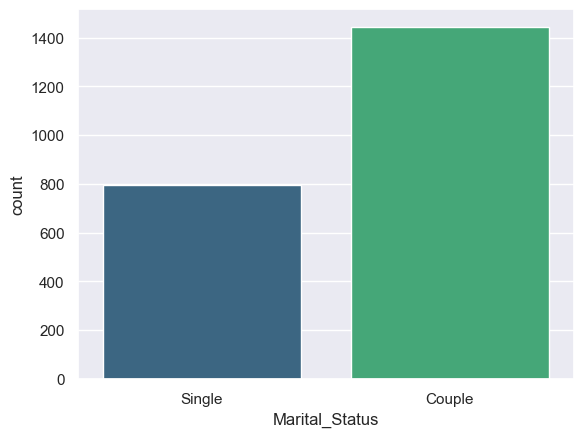

In [1377]:
sns.countplot(data=df , x = 'Marital_Status', palette='viridis')


### Mengecek Missing Values

In [1378]:
df.isnull().sum() / df.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

In [1379]:
mean_imputation_df = df.copy()
mean_imputation_df['Income_Filled'] = mean_imputation_df['Income'].fillna(df['Income'].mean())

In [1380]:
# Mengecek kembali data kolom yang sebelumnya memiliki missing values
df[df['Income'].isnull()]

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10    1994   1983        Graduation  Couple        NaN      1        0          
27    5255   1986        Graduation  Single        NaN      1        0          
43    7281   1959        PhD         Single        NaN      0        0          
48    7244   1951        Graduation  Single        NaN      2        1          
58    8557   1982        Graduation  Single        NaN      1        0          
71    10629  1973        2n Cycle    Couple        NaN      1        0          
90    8996   1957        PhD         Couple        NaN      2        1          
91    9235   1957        Graduation  Single        NaN      1        1          
92    5798   1973        Master      Couple        NaN      0        0          
128   8268   1961        PhD         Couple        NaN      0        1          
133   1295   1963        Graduation  Couple        NaN      0        1          
312   2437   1989        Graduation  Couple        NaN      0        0          
319   2863   1970        Graduation  Single        NaN      1        2          
1379  10475  1970        Master      Couple        NaN      0        1          
1382  2902   1958        Graduation  Couple        NaN      1        1          
1383  4345   1964        2n Cycle    Single        NaN      1        1          
1386  3769   1972        PhD         Couple        NaN      1        0          
2059  7187   1969        Master      Couple        NaN      1        1          
2061  1612   1981        PhD         Single        NaN      1        0          
2078  5079   1971        Graduation  Couple        NaN      1        1          
2079  10339  1954        Master      Couple        NaN      0        1          
2081  3117   1955        Graduation  Single        NaN      0        1          
2084  5250   1943        Master      Single        NaN      0        0          
2228  8720   1978        2n Cycle    Couple        NaN      0        0          

     Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  \
10   2013-11-15   11       5         ...  0                     
27   2013-02-20   19       5         ...  0                     
43   2013-05-11   80       81        ...  3                     
48   2014-01-01   96       48        ...  1                     
58   2013-06-17   57       11        ...  0                     
71   2012-09-14   25       25        ...  0                     
90   2012-11-19   4        230       ...  2                     
91   2014-05-27   45       7         ...  0                     
92   2013-11-23   87       445       ...  4                     
128  2013-11-07   23       352       ...  1                     
133  2013-11-08   96       231       ...  5                     
312  2013-03-06   69       861       ...  5                     
319  2013-08-23   67       738       ...  3                     
1379 2013-01-04   39       187       ...  2                     
1382 2012-03-09   87       19        ...  0                     
1383 2014-12-01   49       5         ...  0                     
1386 2014-02-03   17       25        ...  0                     
2059 2013-05-18   52       375       ...  10                    
2061 2013-05-31   82       23        ...  0                     
2078 2013-03-03   82       71        ...  1                     
2079 2013-06-23   83       161       ...  1                     
2081 2013-10-18   95       264       ...  1                     
2084 2013-10-30   75       532       ...  5                     
2228 2012-12-08   53       32        ...  0                     

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
10    2                  7                  0             0              
27    0                  1                  0             0              
43    4                  2                  0             0              
48    4                  6                  0             0  

### Cleaning Data Outlier Umur pelanggan dan Pengasilan Pelanggan

In [1381]:
# Membuat kolom umur
df['Age'] = 2022 - df['Year_Birth']

In [1382]:
# Melihat Outlier
year_count = df.groupby(['Age'])['Age'].count()
year_count.sort_values(ascending=True).head(15)

Age
129    1 
122    1 
82     1 
81     1 
123    1 
26     2 
28     3 
29     5 
27     5 
79     7 
78     7 
77     8 
30     13
31     15
76     16
Name: Age, dtype: int64

<AxesSubplot: xlabel='Age'>

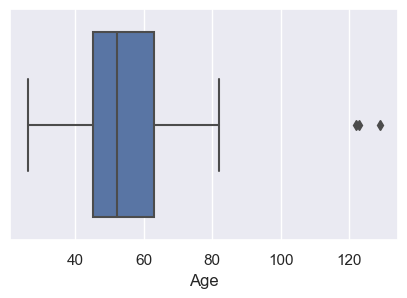

In [1383]:
# Melihat outlier Umur menggunakan Visualisasi Boxplot
plt.figure(figsize= (5,3))
sns.boxplot(data = df, x = df['Age'])

In [1384]:
# Melihat Outlier
df[df['Age']> 100]

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
192  7829   1900        2n Cycle  Single         36640.0  1        0          
239  11004  1893        2n Cycle  Single         60182.0  0        1          
339  1150   1899        PhD       Couple         83532.0  0        0          

    Dt_Customer  Recency  MntWines  ...  NumStorePurchases  NumWebVisitsMonth  \
192 2013-09-26   99       15        ...  2                  5                   
239 2014-05-17   23       8         ...  2                  4                   
339 2013-09-26   36       755       ...  4                  1                   

     AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
192  0             0             0             0             0              
239  0             0             0             0             0              
339  0             0             1             0             0              

     Complain  Response  Age  
192  1         0         122  
239  0         0         129  
339  0         0         123  

[3 rows x 28 columns]

In [1385]:
# Melihat Outlier
df[df['Income']> 600000]

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
2233  9432  1977        Graduation  Couple         666666.0  1         

      Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
2233  0        2013-02-06   23       9         ...  3                   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
2233  6                  0             0             0              

      AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  
2233  0             0             0         0         45   

[1 rows x 28 columns]

>2. Menghapus Data Outlier Umur dan Income

<AxesSubplot: xlabel='Age', ylabel='Count'>

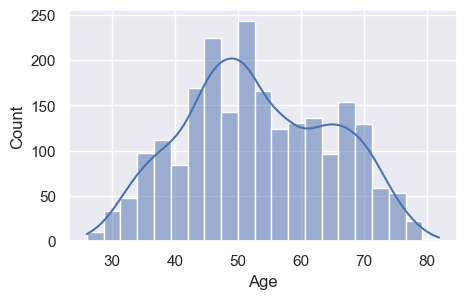

In [1386]:
# Menghapus data outlier kolom Age dengan hanya menampilkan data Age dibawa 100 Tahun
df = df[(df['Age']< 100)]
plt.figure(figsize= (5,3))
sns.histplot(df['Age'], kde=True)

In [1387]:
# cek distribusi kolom Age
from scipy.stats import normaltest
stats, pval=normaltest(df['Age'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho 

tidak normal


<AxesSubplot: xlabel='Income', ylabel='Count'>

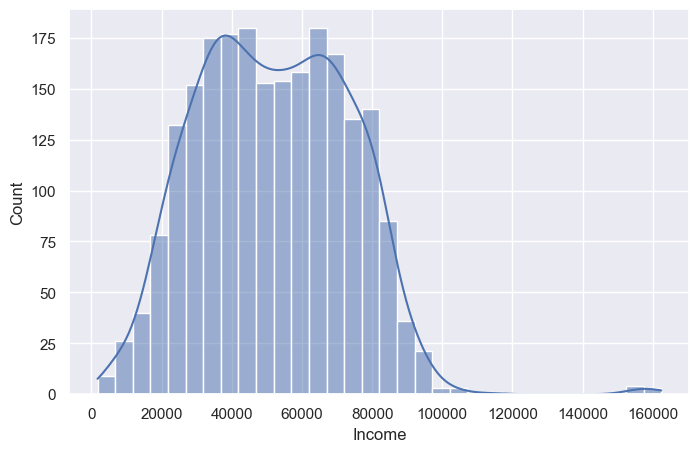

In [1388]:
# Menghapus data outlier pada kolom Income dengan hanya menampilkan data Income dibawah 200000
df = df[(df['Income']< 200000)]
plt.figure(figsize=(8,5))
sns.histplot(df['Income'], kde = True)

In [1389]:
# cek distribusi kolom Income
from scipy.stats import normaltest
stats, pval=normaltest(df['Income'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho 

tidak normal


### **Summary**

**Age**
- Pelanggan kebanyakan memiliki range umur 50 tahun
- Terliat adanya outlier, dimana terdapat pelanggan dengan umur sekitar 120 Tahun-an
- Distribusi dari kolom Age adalah `Tidak Normal`

**Income**
- Terliat adanya outlier pada data Income, dimana terdapat pelanggan dengan pendapatan diatas 600000
- Distribusi dari Kolom Income `Tidak Normal`

## **Data Understanding**

Setelah melewati tahapan *data cleaning*, selanjutnya yang dilakukan adalah mencari tahu bagaimana karakteristik berbelanja seluruh pelanggan.

## Berdasarkan Kelompok Umur pelanggan dan Level Edukasi: `Age_Group` dan `Education`

Pertama-tama, mari kita lihat bagaimana pengaruh umur dan level edukasi pelanggan untuk membeli suatu makanan dan minuman, ataupun barang. Kita akan menganalisis kolom `Age_Group` dan `Education` untuk menjawan beberapa pertanyaan berikut:
* Rentang/Group umur berapa yang memiliki total belanjaan paling banyak, dan item apakah yang paling banyak dibeli berdasarkan Group Umur?
* apakah ada perbedaan antara level edukasi dari umur pelanggan dalam berperilaku berbelanja?


*Dikarenakan kolom `Year_Age` belum tersedia, maka kita akan membuatnya dengan pengurangan  mengurangi tahun 2022 (tahun sekarang) dengan data yang ada di `Year_Birth`, selain itu dikelompokkan sebagai berikut:*

Apabila umur pelanggan di tahun 2022:
- dibawah atau sama dengan 39 tahun = **Young Adults**
- 40 - 59 tahun = **Middle Aged**
- diatas atau sama dengan 60 tahun = **Old Adults**

In [1390]:
# Membuat kolom kelompok umur
age = []
for i in df["Year_Birth"]:
    if i <= 1962:
        age.append("Old Adults")
    elif i >= 1963 and i <=1982:
        age.append("Middle Aged")
    else:
        age.append("Young Adults")
df["Age_Group"] = age

In [1391]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524  1957        Graduation  Single         58138.0  0        0          
1  2174  1954        Graduation  Single         46344.0  1        1          
2  4141  1965        Graduation  Couple         71613.0  0        0          
3  6182  1984        Graduation  Couple         26646.0  1        0          
4  5324  1981        PhD         Couple         58293.0  1        0          

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0 2012-04-09   58       635       ...  7                  0              
1 2014-08-03   38       11        ...  5                  0              
2 2013-08-21   26       426       ...  4                  0              
3 2014-10-02   26       11        ...  6                  0              
4 2014-01-19   94       173       ...  5                  0              

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0  0             0             0             0             0         1          
1  0             0             0             0             0         0          
2  0             0             0             0             0         0          
3  0             0             0             0             0         0          
4  0             0             0             0             0         0          

   Age     Age_Group  
0  65   Old Adults    
1  68   Old Adults    
2  57   Middle Aged   
3  38   Young Adults  
4  41   Middle Aged   

[5 rows x 29 columns]

Text(0.5, 1.0, 'Jumlah Pelanggan Marketplace X')

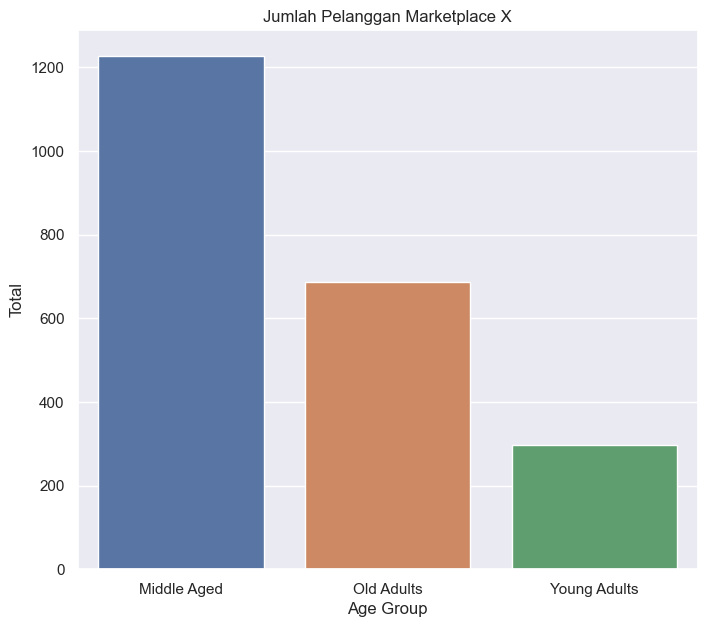

In [1392]:
df_AgeGroup = df['Age_Group'].value_counts().reset_index().rename(columns={'index':'Age Group','Age_Group':'Total'})

plt.figure(figsize=(8,7))
sns.barplot(data=df_AgeGroup, x='Age Group', y='Total')
plt.title('Jumlah Pelanggan Marketplace X')


In [1393]:
df_AgeGroup

Age Group  Total
0  Middle Aged   1227 
1  Old Adults    687  
2  Young Adults  298

In [1394]:
dfPerProducts_pivot = df.pivot_table(index = 'Age_Group',
                        values= ('MntWines', 
                                  'MntFruits', 
                                  'MntMeatProducts', 
                                  'MntFishProducts', 
                                  'MntSweetProducts', 
                                  'MntGoldProds'),
                        aggfunc= ('count', 'sum','mean')
                        )
dfPerProducts_pivot 

MntFishProducts                   MntFruits                    \
                       count       mean    sum     count       mean    sum   
Age_Group                                                                    
Middle Aged   1227            34.678892  42551  1227      24.712306  30322   
Old Adults    687             43.285298  29737  687       28.365357  19487   
Young Adults  298             36.882550  10991  298       28.295302  8432    

             MntGoldProds                   MntMeatProducts              \
                    count       mean    sum           count        mean   
Age_Group                                                                 
Middle Aged   1227         41.266504  50634  1227            148.832111   
Old Adults    687          49.151383  33767  687             191.119360   
Young Adults  298          42.828859  12763  298             186.422819   

                     MntSweetProducts                   MntWines              \
                 sum            count       mean    sum    count        mean   
Age_Group                                                                      
Middle Aged   182617  1227             25.129584  30834  1227     277.320293   
Old Adults    131299  687              29.687045  20395  687      382.858806   
Young Adults  55554   298              28.852349  8598   298      241.610738   

                      
                 sum  
Age_Group             
Middle Aged   340272  
Old Adults    263024  
Young Adults  72000

In [1395]:
dfPerProducts_pivot1 = df.pivot_table(index = 'Age_Group',
                        values= ('MntWines', 
                                  'MntFruits', 
                                  'MntMeatProducts', 
                                  'MntFishProducts', 
                                  'MntSweetProducts', 
                                  'MntGoldProds'),
                        aggfunc= ('sum')
                        )
dfPerProducts_pivot1.loc['Total']=dfPerProducts_pivot1.sum()

cm = sns.light_palette("green", as_cmap=True)
dfPerProducts_pivot1.style.background_gradient(cmap=cm)

In [1396]:
# Persentase rata-rata pembelian produk wine
print('Persentase Segmentasi Rata-Rata Penjualan Produk Wines')
print('Total Penjualan Produk Wines', (df['MntWines'].sum()))
print('Data dalam bentuk %')

dfWines = df.groupby('Age_Group')['MntWines'].sum()
dfWinesAvg = dfWines/(df['MntWines'].sum())*100,
dfWinesAvg


Persentase Segmentasi Rata-Rata Penjualan Produk Wines
Total Penjualan Produk Wines 675296
Data dalam bentuk %


(Age_Group
 Middle Aged     50.388570
 Old Adults      38.949438
 Young Adults    10.661991
 Name: MntWines, dtype: float64,)

In [1397]:
# Persentase rata-rata pembelian produk buah
print('Persentase Segmentasi Rata-Rata Penjualan Produk Buah')
print('Total Penjualan Produk Buah', (df['MntFruits'].sum()))
print('Data dalam bentuk %')

dfFruits = df.groupby('Age_Group')['MntFruits'].sum()
dfFruitsAvg = dfFruits/(df['MntFruits'].sum())*100,
dfFruitsAvg

Persentase Segmentasi Rata-Rata Penjualan Produk Buah
Total Penjualan Produk Buah 58241
Data dalam bentuk %


(Age_Group
 Middle Aged     52.062980
 Old Adults      33.459247
 Young Adults    14.477773
 Name: MntFruits, dtype: float64,)

In [1398]:
# Persentase rata-rata pembelian produk daging
print('Persentase Segmentasi Rata-Rata Penjualan Produk Daging')
print('Total Penjualan Produk Buah', (df['MntMeatProducts'].sum()))
print('Data dalam bentuk %')

dfMeat = df.groupby('Age_Group')['MntMeatProducts'].sum()
dfMeatAvg = dfMeat/(df['MntMeatProducts'].sum())*100,
dfMeatAvg

Persentase Segmentasi Rata-Rata Penjualan Produk Daging
Total Penjualan Produk Buah 369470
Data dalam bentuk %


(Age_Group
 Middle Aged     49.426746
 Old Adults      35.537121
 Young Adults    15.036133
 Name: MntMeatProducts, dtype: float64,)

In [1399]:
# Persentase rata-rata pembelian produk ikan
print('Persentase Segmentasi Rata-Rata Penjualan Produk Ikan')
print('Total Penjualan Produk Buah', (df['MntFishProducts'].sum()))
print('Data dalam bentuk %')

dfFish = df.groupby('Age_Group')['MntFishProducts'].sum()
dfFishAvg = dfFish/(df['MntFishProducts'].sum())*100,
dfFishAvg

Persentase Segmentasi Rata-Rata Penjualan Produk Ikan
Total Penjualan Produk Buah 83279
Data dalam bentuk %


(Age_Group
 Middle Aged     51.094514
 Old Adults      35.707681
 Young Adults    13.197805
 Name: MntFishProducts, dtype: float64,)

In [1400]:
# Persentase rata-rata pembelian produk manis
print('Persentase Segmentasi Rata-Rata Penjualan Produk Manis')
print('Total Penjualan Produk Buah', (df['MntSweetProducts'].sum()))
print('Data dalam bentuk %')

dfSweets = df.groupby('Age_Group')['MntSweetProducts'].sum()
dfSweetsAvg = dfSweets/(df['MntSweetProducts'].sum())*100
dfSweetsAvg

Persentase Segmentasi Rata-Rata Penjualan Produk Manis
Total Penjualan Produk Buah 59827
Data dalam bentuk %


Age_Group
Middle Aged     51.538603
Old Adults      34.089959
Young Adults    14.371438
Name: MntSweetProducts, dtype: float64

In [1401]:
# Persentase rata-rata pembelian produk emas
print('Persentase Segmentasi Rata-Rata Penjualan Produk Emas')
print('Total Penjualan Produk Buah', (df['MntGoldProds'].sum()))
print('Data dalam bentuk %')


dfGoldProducts = df.groupby('Age_Group')['MntGoldProds'].sum()
dfGoldProductsAvg = dfGoldProducts/(df['MntGoldProds'].sum())*100
dfGoldProductsAvg

Persentase Segmentasi Rata-Rata Penjualan Produk Emas
Total Penjualan Produk Buah 97164
Data dalam bentuk %


Age_Group
Middle Aged     52.111893
Old Adults      34.752583
Young Adults    13.135523
Name: MntGoldProds, dtype: float64

In [1402]:
df['TotalPurchasedItems'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524  1957        Graduation  Single         58138.0  0        0          
1  2174  1954        Graduation  Single         46344.0  1        1          
2  4141  1965        Graduation  Couple         71613.0  0        0          
3  6182  1984        Graduation  Couple         26646.0  1        0          
4  5324  1981        PhD         Couple         58293.0  1        0          

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0 2012-04-09   58       635       ...  0             0              
1 2014-08-03   38       11        ...  0             0              
2 2013-08-21   26       426       ...  0             0              
3 2014-10-02   26       11        ...  0             0              
4 2014-01-19   94       173       ...  0             0              

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  \
0  0             0             0             0         1         65    
1  0             0             0             0         0         68    
2  0             0             0             0         0         57    
3  0             0             0             0         0         38    
4  0             0             0             0         0         41    

      Age_Group  TotalPurchasedItems  
0  Old Adults    1617                 
1  Old Adults    27                   
2  Middle Aged   776                  
3  Young Adults  53                   
4  Middle Aged   422                  

[5 rows x 30 columns]

In [1403]:
# Persentase rata-rata total pembelian
print('Persentase Segmentasi Rata-Rata Total Penjualan')
print('Total Penjualan Produk Buah', (df['TotalPurchasedItems'].sum()))
print('Data dalam bentuk %')


dfTotalPurchased = df.groupby('Age_Group')['TotalPurchasedItems'].sum()
dfTotalPurchasedAvg = dfTotalPurchased/(df['TotalPurchasedItems'].sum())*100
dfTotalPurchasedAvg

Persentase Segmentasi Rata-Rata Total Penjualan
Total Penjualan Produk Buah 1343277
Data dalam bentuk %


Age_Group
Middle Aged     50.416258
Old Adults      37.051852
Young Adults    12.531890
Name: TotalPurchasedItems, dtype: float64

In [1404]:
dfTotalProducst_pivot = df.pivot_table(index = 'Age_Group',
                         values = 'TotalPurchasedItems',
                         aggfunc= 'sum'
                         )
dfTotalProducst_pivot

TotalPurchasedItems
Age_Group                        
Middle Aged   677230             
Old Adults    497709             
Young Adults  168338

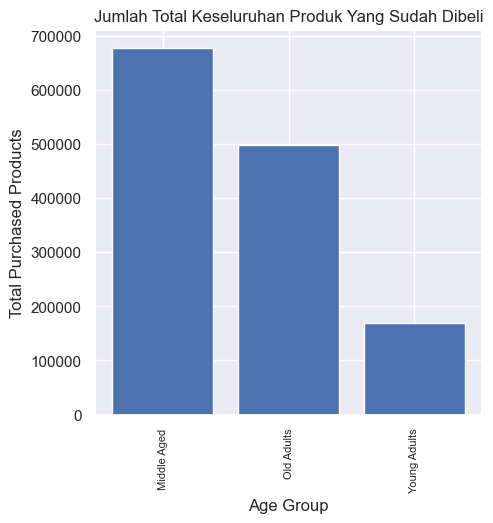

In [1405]:
import matplotlib.pyplot as plt

Group = [Group for Group, df in df.groupby(['Age_Group'])]

plt.figure(figsize=(5,5))
plt.bar(Group,df.groupby(['Age_Group']).sum()['TotalPurchasedItems'])
plt.title('Jumlah Total Keseluruhan Produk Yang Sudah Dibeli')
plt.ylabel('Total Purchased Products')
plt.xlabel('Age Group')
plt.xticks(Group, rotation='vertical', size=8)
plt.show()

Melihat bagaimana hubungan antara Level Edukasi (`Education`) dari Umur Pelanggan (`Group Age`) dalam berperilaku dalam berbelanja

In [1406]:
dfTotalProducst_pivot = df.pivot_table(index = 'Education',
                         values = 'TotalPurchasedItems',
                         aggfunc= 'sum'
                         ).sort_values(by='TotalPurchasedItems', ascending=False)
                    
dfTotalProducst_pivot

TotalPurchasedItems
Education                      
Graduation  693740             
PhD         323656             
Master      222565             
2n Cycle    98899              
Basic       4417

In [1407]:
dfTotalProducst_pivot = df.pivot_table(index = ('Education', 'Age_Group'),
                         values= ('MntWines', 
                                  'MntFruits', 
                                  'MntMeatProducts', 
                                  'MntFishProducts', 
                                  'MntSweetProducts', 
                                  'MntGoldProds', 'TotalPurchasedItems'),
                         aggfunc= 'sum'
                         ).sort_values(by= 'TotalPurchasedItems', ascending=False)

cm = sns.light_palette("green", as_cmap=True)
dfTotalProducst_pivot.style.background_gradient(cmap=cm)


Melihat bagaimana hubungan antara Pendapatan  (`Income`) dari Umur Pelanggan (`Group Age`) dalam berperilaku dalam berbelanja

In [1408]:
df['Income'].describe()


count    2212.000000  
mean     51958.810579 
std      21527.278844 
min      1730.000000  
25%      35233.500000 
50%      51371.000000 
75%      68487.000000 
max      162397.000000
Name: Income, dtype: float64

In [1409]:
Total_Income_pv = df.pivot_table(index = 'Education',
                        values= ('Income'),
                        aggfunc= ('mean'
                         )).sort_values(by= 'Income', ascending=False)

cm = sns.light_palette("green", as_cmap=True)
Total_Income_pv.style.background_gradient(cmap=cm)

dikarenakan data pada kolom `Income` memiliki variasi yang sangat banyak, maka yang kita lakukan adalah dengan mengkategorikannya berdasarkan range pendapatannya per tahun, yaitu sebagai berikut:
- **Low_Income** : < 16,116
- **Low_Middle_Income**  : 16,117 - 30,408
- **Upper_Middle_Income** : 30,409 - 75,000
- **High_Income** : > 75,001

selanjutnya hapus `Income` diatas 200000 karena merupakan data outlier. 



In [1410]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524  1957        Graduation  Single         58138.0  0        0          
1  2174  1954        Graduation  Single         46344.0  1        1          
2  4141  1965        Graduation  Couple         71613.0  0        0          
3  6182  1984        Graduation  Couple         26646.0  1        0          
4  5324  1981        PhD         Couple         58293.0  1        0          

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0 2012-04-09   58       635       ...  0             0              
1 2014-08-03   38       11        ...  0             0              
2 2013-08-21   26       426       ...  0             0              
3 2014-10-02   26       11        ...  0             0              
4 2014-01-19   94       173       ...  0             0              

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  \
0  0             0             0             0         1         65    
1  0             0             0             0         0         68    
2  0             0             0             0         0         57    
3  0             0             0             0         0         38    
4  0             0             0             0         0         41    

      Age_Group  TotalPurchasedItems  
0  Old Adults    1617                 
1  Old Adults    27                   
2  Middle Aged   776                  
3  Young Adults  53                   
4  Middle Aged   422                  

[5 rows x 30 columns]

In [1411]:
# Membuat kolom kelompok umur
IncomeGroup = []
for i in df["Income"]:
    if i < 16116.0:
        IncomeGroup.append("Low Income")
    elif i >= 16117  and i <= 30408:
        IncomeGroup.append("Low Middle Income")
    elif i >= 30408 and i <= 75000:
        IncomeGroup.append("Upper Middle Income")
    else:
        IncomeGroup.append("High Income")
df["Income_Group"] = IncomeGroup

In [1412]:
df = df.drop(df[(df['Income'] > 200000)].index)

Text(0.5, 1.0, 'Jumlah Customer Berdasarkan Income')

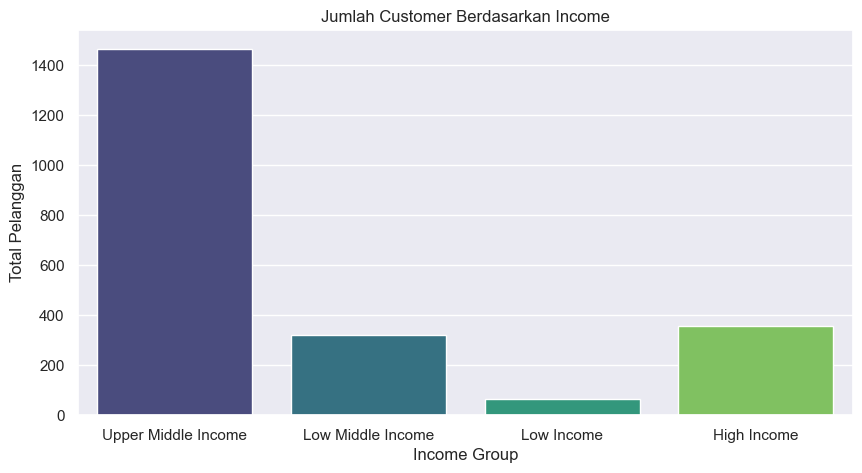

In [1413]:
plt.figure(figsize=(10,5))
sns.countplot(data=df , x = 'Income_Group', palette='viridis')
plt.xlabel('Income Group')
plt.ylabel('Total Pelanggan')
plt.title('Jumlah Customer Berdasarkan Income')

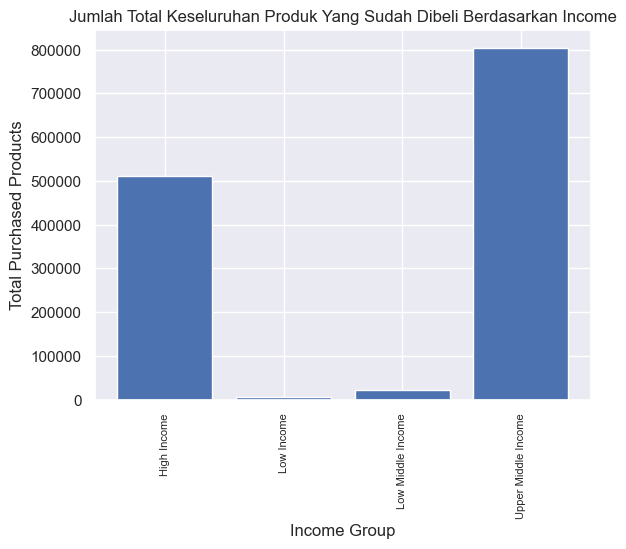

In [1414]:
import matplotlib.pyplot as plt

Group1 = [Group for Group, df in df.groupby(['Income_Group'])]

plt.bar(Group1,df.groupby(['Income_Group']).sum()['TotalPurchasedItems'])
plt.title('Jumlah Total Keseluruhan Produk Yang Sudah Dibeli Berdasarkan Income')
plt.ylabel('Total Purchased Products')
plt.xlabel('Income Group')
plt.xticks(Group1, rotation='vertical', size=8)
plt.show()

In [1415]:
# Membuat kolom `Family_Numbers` yang berisikan jumlah orang dalam satu keluarga
person = []
for i in df['Marital_Status']:
    if i == 'Single':
        person.append(1)
    elif i == 'Couple':
        person.append(2)

df['Family_Members'] = person + df['Kidhome'] + df['Teenhome']

In [1416]:
# Membuat tolom Total Children
df['TotalChildren'] = df['Kidhome'] + df['Teenhome']

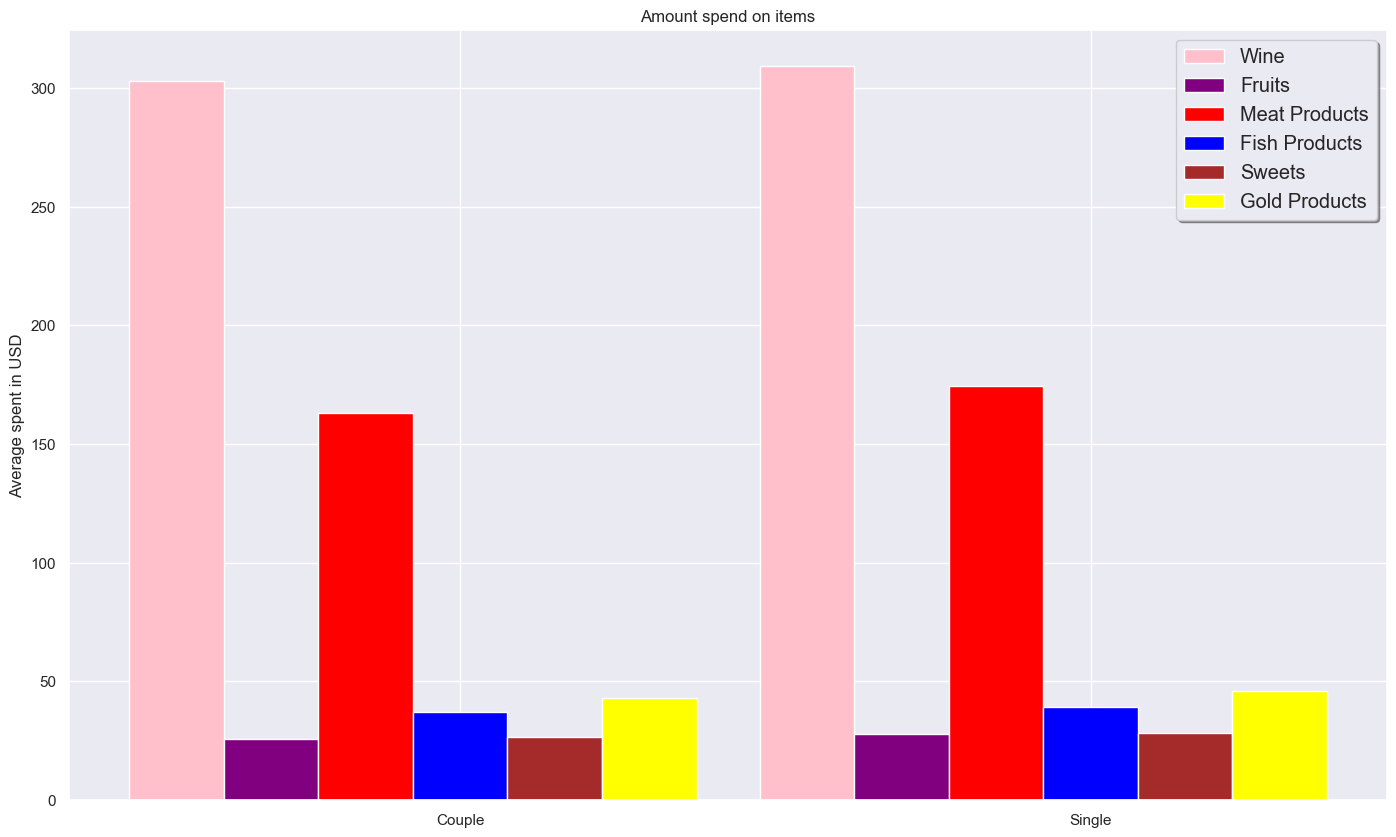

In [1417]:
label=df.groupby('Marital_Status').count()['ID'].index
label

fish_spent=df.groupby('Marital_Status').mean()['MntFishProducts']
fruit_spent=df.groupby('Marital_Status').mean()['MntFruits']
gold_spent=df.groupby('Marital_Status').mean()['MntGoldProds']
meat_spent=df.groupby('Marital_Status').mean()['MntMeatProducts']
sweet_spent=df.groupby('Marital_Status').mean()['MntSweetProducts']
wine_spent=df.groupby('Marital_Status').mean()['MntWines']

xpos=np.arange(len(label))
xpos



plt.figure(figsize=(17,10))
plt.bar(xpos-0.45,wine_spent,width=0.15,label='Wine',color='pink')
plt.bar(xpos-0.3,fruit_spent,width=0.15,label='Fruits',color='purple')
plt.bar(xpos-0.15,meat_spent,width=0.15,label='Meat Products',color='red')
plt.bar(xpos,fish_spent,width=0.15,label='Fish Products',color='blue')
plt.bar(xpos+0.15,sweet_spent,width=0.15,label='Sweets',color='brown')
plt.bar(xpos+0.3,gold_spent,width=0.15,label='Gold Products',color='yellow')

plt.xticks(xpos,label)
plt.ylabel('Average spent in USD')
plt.title('Amount spend on items')
plt.legend(loc='best',shadow=True,fontsize='large')

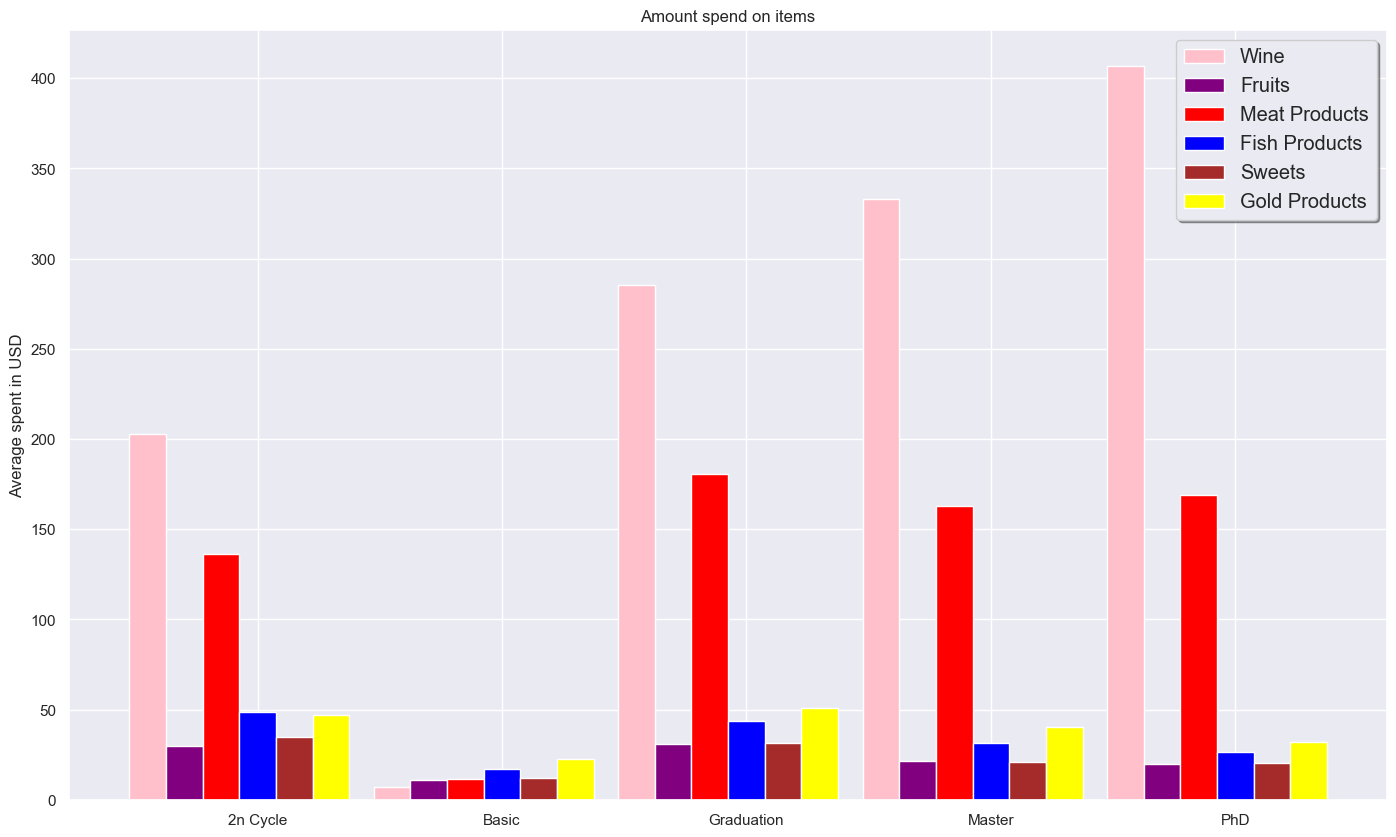

In [1418]:
label=df.groupby('Education').count()['ID'].index
label

fish_spent=df.groupby('Education').mean()['MntFishProducts']
fruit_spent=df.groupby('Education').mean()['MntFruits']
gold_spent=df.groupby('Education').mean()['MntGoldProds']
meat_spent=df.groupby('Education').mean()['MntMeatProducts']
sweet_spent=df.groupby('Education').mean()['MntSweetProducts']
wine_spent=df.groupby('Education').mean()['MntWines']

xpos=np.arange(len(label))
xpos



plt.figure(figsize=(17,10))
plt.bar(xpos-0.45,wine_spent,width=0.15,label='Wine',color='pink')
plt.bar(xpos-0.3,fruit_spent,width=0.15,label='Fruits',color='purple')
plt.bar(xpos-0.15,meat_spent,width=0.15,label='Meat Products',color='red')
plt.bar(xpos,fish_spent,width=0.15,label='Fish Products',color='blue')
plt.bar(xpos+0.15,sweet_spent,width=0.15,label='Sweets',color='brown')
plt.bar(xpos+0.3,gold_spent,width=0.15,label='Gold Products',color='yellow')

plt.xticks(xpos,label)
plt.ylabel('Average spent in USD')
plt.title('Amount spend on items')
plt.legend(loc='best',shadow=True,fontsize='large')

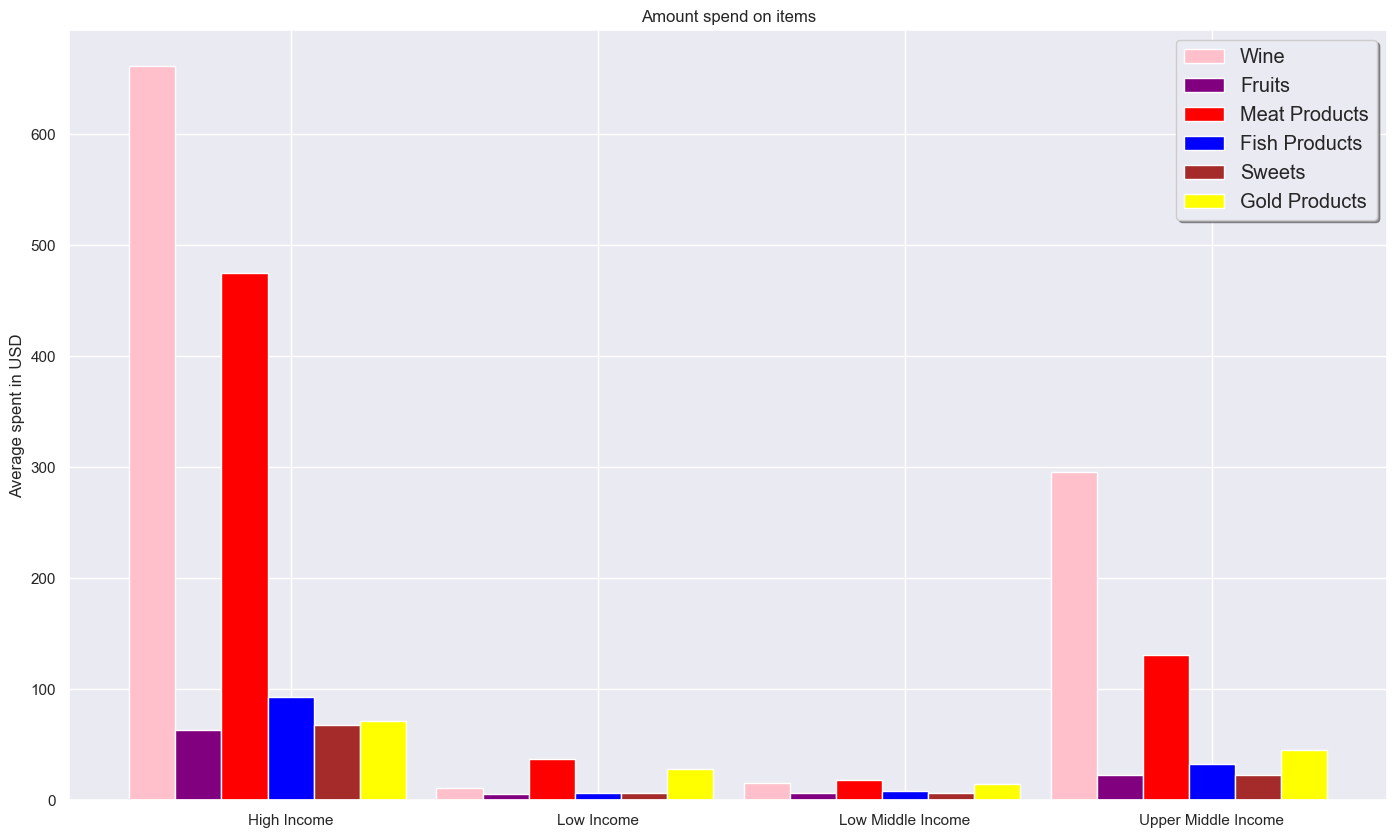

In [1419]:
label=df.groupby('Income_Group').count()['ID'].index
label

fish_spent=df.groupby('Income_Group').mean()['MntFishProducts']
fruit_spent=df.groupby('Income_Group').mean()['MntFruits']
gold_spent=df.groupby('Income_Group').mean()['MntGoldProds']
meat_spent=df.groupby('Income_Group').mean()['MntMeatProducts']
sweet_spent=df.groupby('Income_Group').mean()['MntSweetProducts']
wine_spent=df.groupby('Income_Group').mean()['MntWines']

xpos=np.arange(len(label))
xpos



plt.figure(figsize=(17,10))
plt.bar(xpos-0.45,wine_spent,width=0.15,label='Wine',color='pink')
plt.bar(xpos-0.3,fruit_spent,width=0.15,label='Fruits',color='purple')
plt.bar(xpos-0.15,meat_spent,width=0.15,label='Meat Products',color='red')
plt.bar(xpos,fish_spent,width=0.15,label='Fish Products',color='blue')
plt.bar(xpos+0.15,sweet_spent,width=0.15,label='Sweets',color='brown')
plt.bar(xpos+0.3,gold_spent,width=0.15,label='Gold Products',color='yellow')

plt.xticks(xpos,label)
plt.ylabel('Average spent in USD')
plt.title('Amount spend on items')
plt.legend(loc='best',shadow=True,fontsize='large')

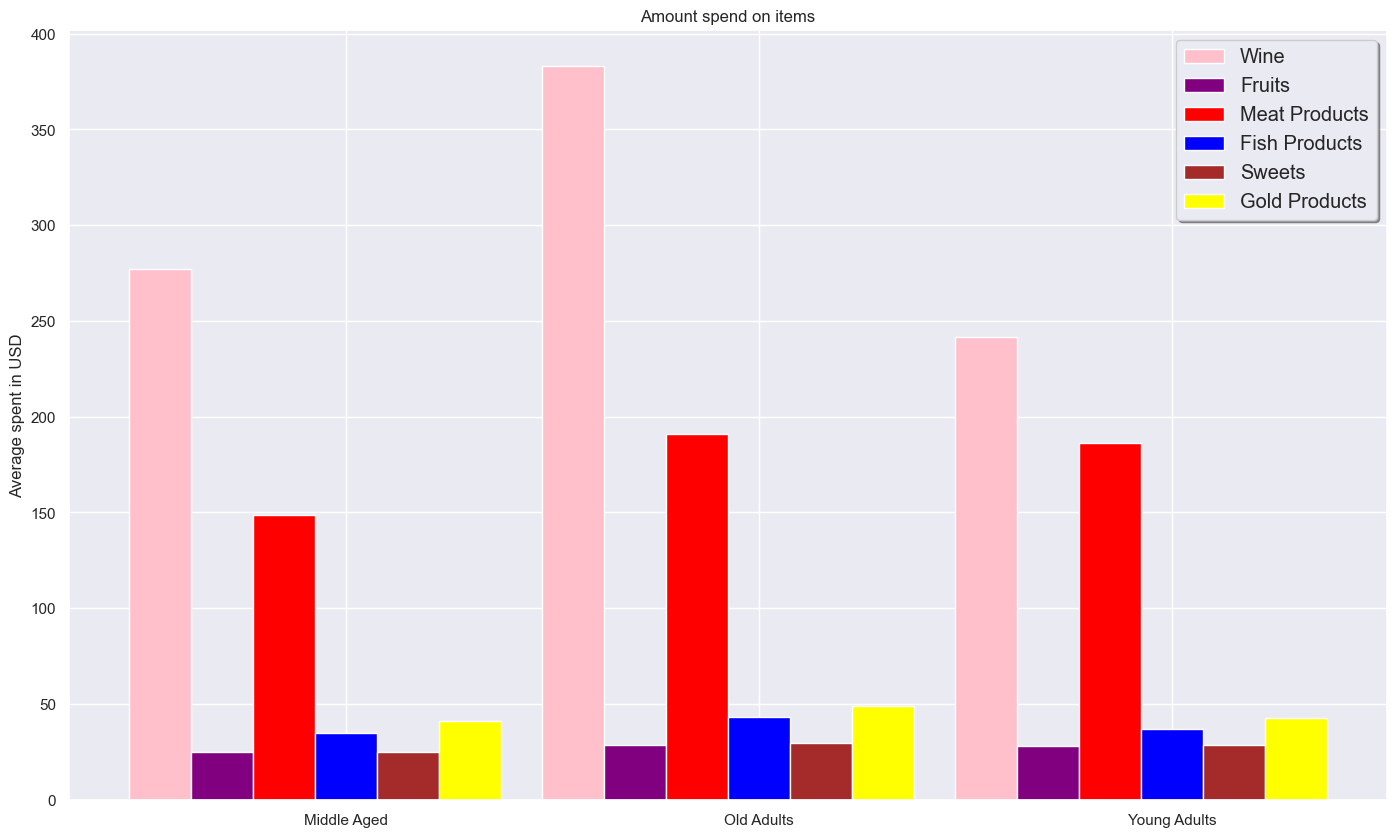

In [1420]:
label=df.groupby('Age_Group').count()['ID'].index
label

fish_spent=df.groupby('Age_Group').mean()['MntFishProducts']
fruit_spent=df.groupby('Age_Group').mean()['MntFruits']
gold_spent=df.groupby('Age_Group').mean()['MntGoldProds']
meat_spent=df.groupby('Age_Group').mean()['MntMeatProducts']
sweet_spent=df.groupby('Age_Group').mean()['MntSweetProducts']
wine_spent=df.groupby('Age_Group').mean()['MntWines']

xpos=np.arange(len(label))
xpos



plt.figure(figsize=(17,10))
plt.bar(xpos-0.45,wine_spent,width=0.15,label='Wine',color='pink')
plt.bar(xpos-0.3,fruit_spent,width=0.15,label='Fruits',color='purple')
plt.bar(xpos-0.15,meat_spent,width=0.15,label='Meat Products',color='red')
plt.bar(xpos,fish_spent,width=0.15,label='Fish Products',color='blue')
plt.bar(xpos+0.15,sweet_spent,width=0.15,label='Sweets',color='brown')
plt.bar(xpos+0.3,gold_spent,width=0.15,label='Gold Products',color='yellow')

plt.xticks(xpos,label)
plt.ylabel('Average spent in USD')
plt.title('Amount spend on items')
plt.legend(loc='best',shadow=True,fontsize='large')

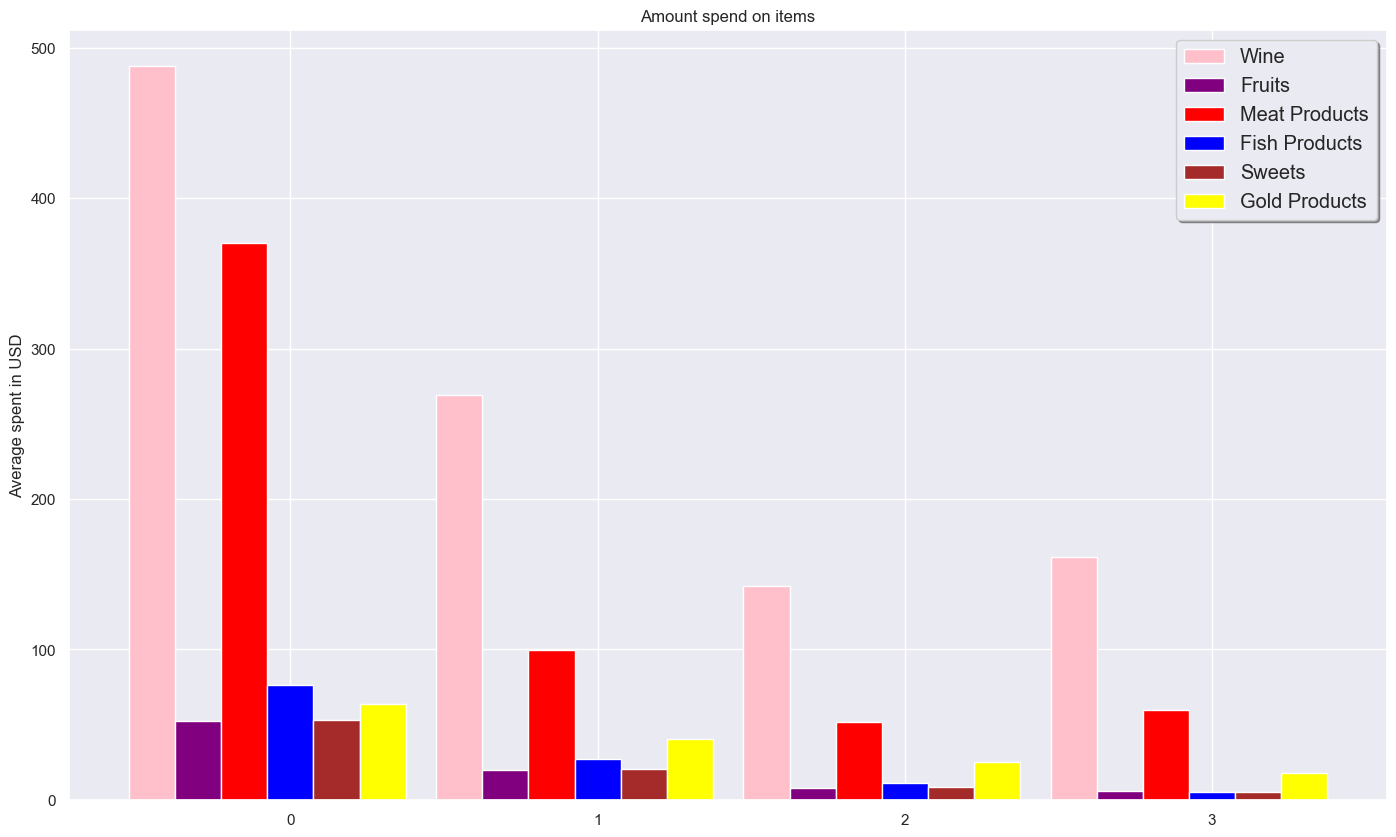

In [1421]:
label=df.groupby('TotalChildren').count()['ID'].index
label

fish_spent=df.groupby('TotalChildren').mean()['MntFishProducts']
fruit_spent=df.groupby('TotalChildren').mean()['MntFruits']
gold_spent=df.groupby('TotalChildren').mean()['MntGoldProds']
meat_spent=df.groupby('TotalChildren').mean()['MntMeatProducts']
sweet_spent=df.groupby('TotalChildren').mean()['MntSweetProducts']
wine_spent=df.groupby('TotalChildren').mean()['MntWines']

xpos=np.arange(len(label))
xpos



plt.figure(figsize=(17,10))
plt.bar(xpos-0.45,wine_spent,width=0.15,label='Wine',color='pink')
plt.bar(xpos-0.3,fruit_spent,width=0.15,label='Fruits',color='purple')
plt.bar(xpos-0.15,meat_spent,width=0.15,label='Meat Products',color='red')
plt.bar(xpos,fish_spent,width=0.15,label='Fish Products',color='blue')
plt.bar(xpos+0.15,sweet_spent,width=0.15,label='Sweets',color='brown')
plt.bar(xpos+0.3,gold_spent,width=0.15,label='Gold Products',color='yellow')

plt.xticks(xpos,label)
plt.ylabel('Average spent in USD')
plt.title('Amount spend on items')
plt.legend(loc='best',shadow=True,fontsize='large')

In [1422]:
dfTotalProducst_pivot = df.pivot_table(index = ('Education', 'Age_Group', 'Income_Group', 'Family_Members', 'TotalChildren'),
                         values= ('MntWines', 
                                  'MntFruits', 
                                  'MntMeatProducts', 
                                  'MntFishProducts', 
                                  'MntSweetProducts', 
                                  'MntGoldProds', 'TotalPurchasedItems'),
                         aggfunc= ('sum')
                         ).sort_values(by= 'TotalPurchasedItems', ascending=False).head(20)


cm = sns.light_palette("green", as_cmap=True)
dfTotalProducst_pivot.style.background_gradient(cmap=cm)



In [1423]:
dfTotalProducst_pivot = df.pivot_table(index = ('Education', 'Age_Group', 'Income_Group', 'Family_Members', 'TotalChildren'),
                         values= ('MntWines', 
                                  'MntFruits', 
                                  'MntMeatProducts', 
                                  'MntFishProducts', 
                                  'MntSweetProducts', 
                                  'MntGoldProds', 'TotalPurchasedItems'),
                         aggfunc= ('sum')
                         ).sort_values(by= 'TotalPurchasedItems', ascending=False).tail(10)


cm = sns.dark_palette("red", as_cmap=True)
dfTotalProducst_pivot.style.background_gradient(cmap=cm)

### Pembelian dilihat dari Total Anak Kecil (`Kidhome`) yang ada dalam satu rumah tangga

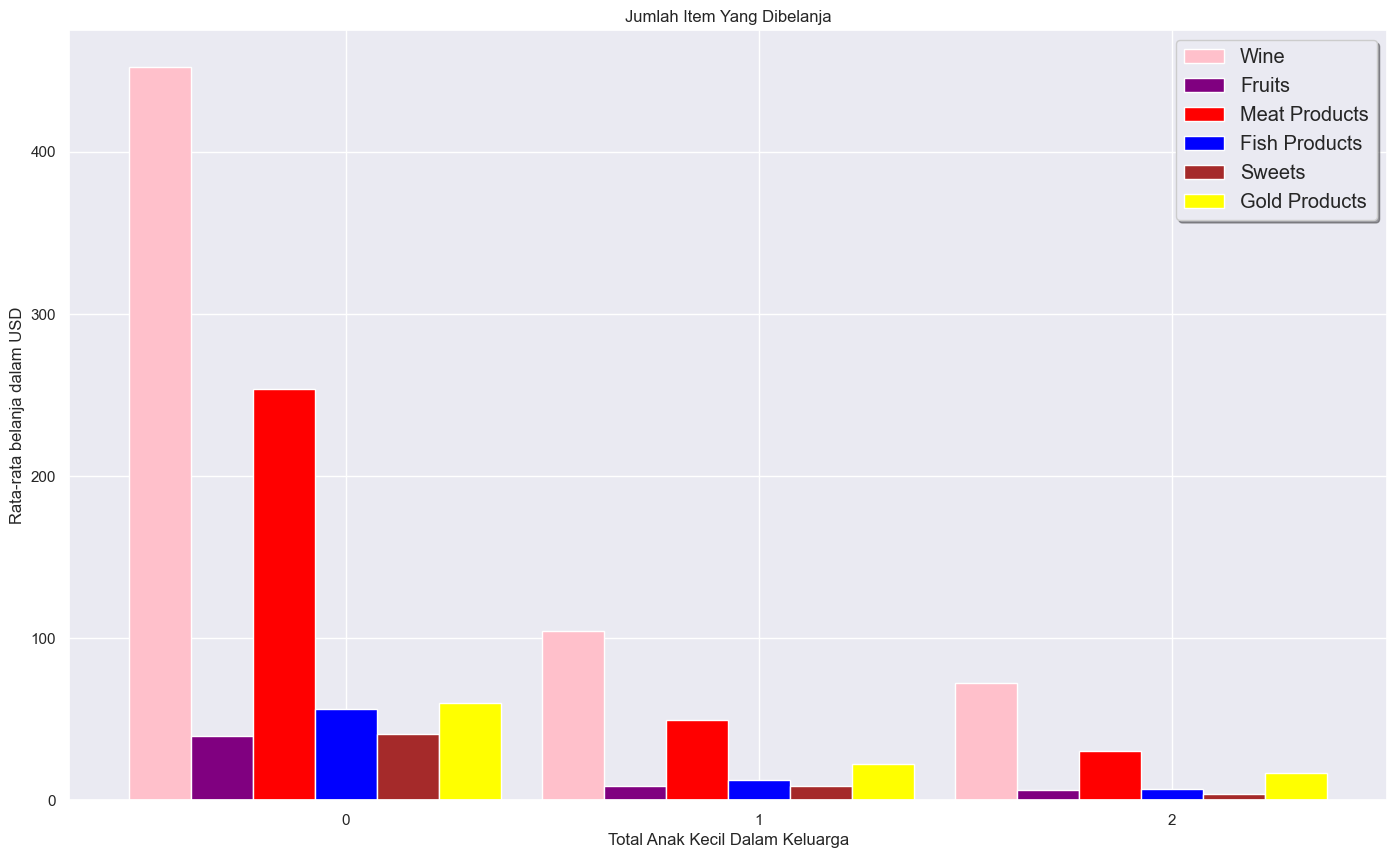

In [1424]:
label=df.groupby('Kidhome').count()['ID'].index
label

fish_spent=df.groupby('Kidhome').mean()['MntFishProducts']
fruit_spent=df.groupby('Kidhome').mean()['MntFruits']
gold_spent=df.groupby('Kidhome').mean()['MntGoldProds']
meat_spent=df.groupby('Kidhome').mean()['MntMeatProducts']
sweet_spent=df.groupby('Kidhome').mean()['MntSweetProducts']
wine_spent=df.groupby('Kidhome').mean()['MntWines']

xpos=np.arange(len(label))
xpos



plt.figure(figsize=(17,10))
plt.bar(xpos-0.45,wine_spent,width=0.15,label='Wine',color='pink')
plt.bar(xpos-0.3,fruit_spent,width=0.15,label='Fruits',color='purple')
plt.bar(xpos-0.15,meat_spent,width=0.15,label='Meat Products',color='red')
plt.bar(xpos,fish_spent,width=0.15,label='Fish Products',color='blue')
plt.bar(xpos+0.15,sweet_spent,width=0.15,label='Sweets',color='brown')
plt.bar(xpos+0.3,gold_spent,width=0.15,label='Gold Products',color='yellow')

plt.xlabel('Total Anak Kecil Dalam Keluarga')
plt.xticks(xpos,label)
plt.ylabel('Rata-rata belanja dalam USD')
plt.title('Jumlah Item Yang Dibelanja')
plt.legend(loc='best',shadow=True,fontsize='large')

### Pembelian dilihat dari Total Anak Remaja (`Teenhome`) yang ada dalam satu rumah tangga

Dilihat dari 

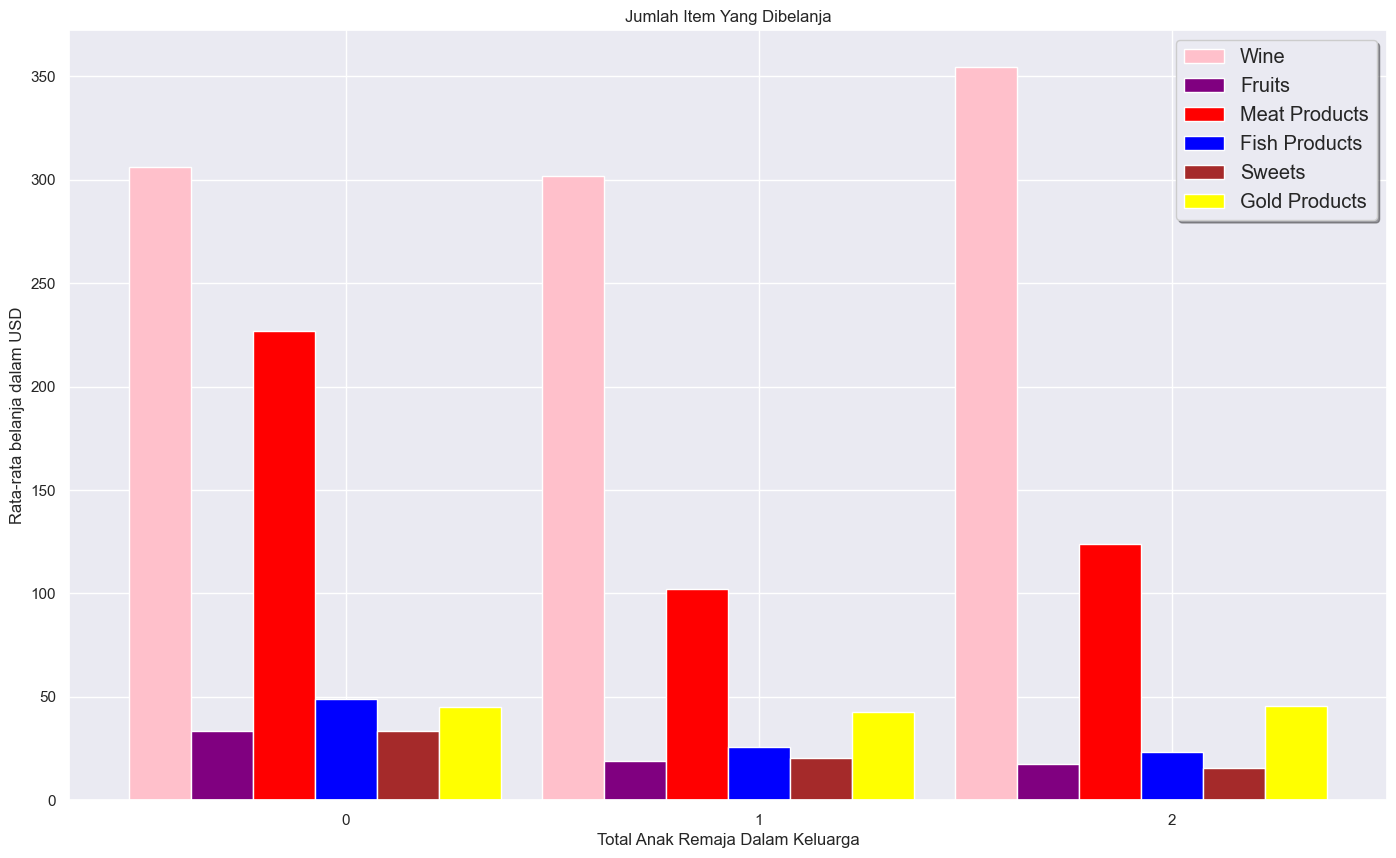

In [1425]:
label=df.groupby('Teenhome').count()['ID'].index
label

fish_spent=df.groupby('Teenhome').mean()['MntFishProducts']
fruit_spent=df.groupby('Teenhome').mean()['MntFruits']
gold_spent=df.groupby('Teenhome').mean()['MntGoldProds']
meat_spent=df.groupby('Teenhome').mean()['MntMeatProducts']
sweet_spent=df.groupby('Teenhome').mean()['MntSweetProducts']
wine_spent=df.groupby('Teenhome').mean()['MntWines']

xpos=np.arange(len(label))
xpos



plt.figure(figsize=(17,10))
plt.bar(xpos-0.45,wine_spent,width=0.15,label='Wine',color='pink')
plt.bar(xpos-0.3,fruit_spent,width=0.15,label='Fruits',color='purple')
plt.bar(xpos-0.15,meat_spent,width=0.15,label='Meat Products',color='red')
plt.bar(xpos,fish_spent,width=0.15,label='Fish Products',color='blue')
plt.bar(xpos+0.15,sweet_spent,width=0.15,label='Sweets',color='brown')
plt.bar(xpos+0.3,gold_spent,width=0.15,label='Gold Products',color='yellow')

plt.xlabel('Total Anak Remaja Dalam Keluarga')
plt.xticks(xpos,label)
plt.ylabel('Rata-rata belanja dalam USD')
plt.title('Jumlah Item Yang Dibelanja')
plt.legend(loc='best',shadow=True,fontsize='large')

### Pembelian dilihat dari Total Anak Keseluruhan (`TotalChildren`) yang ada dalam satu rumah tangga

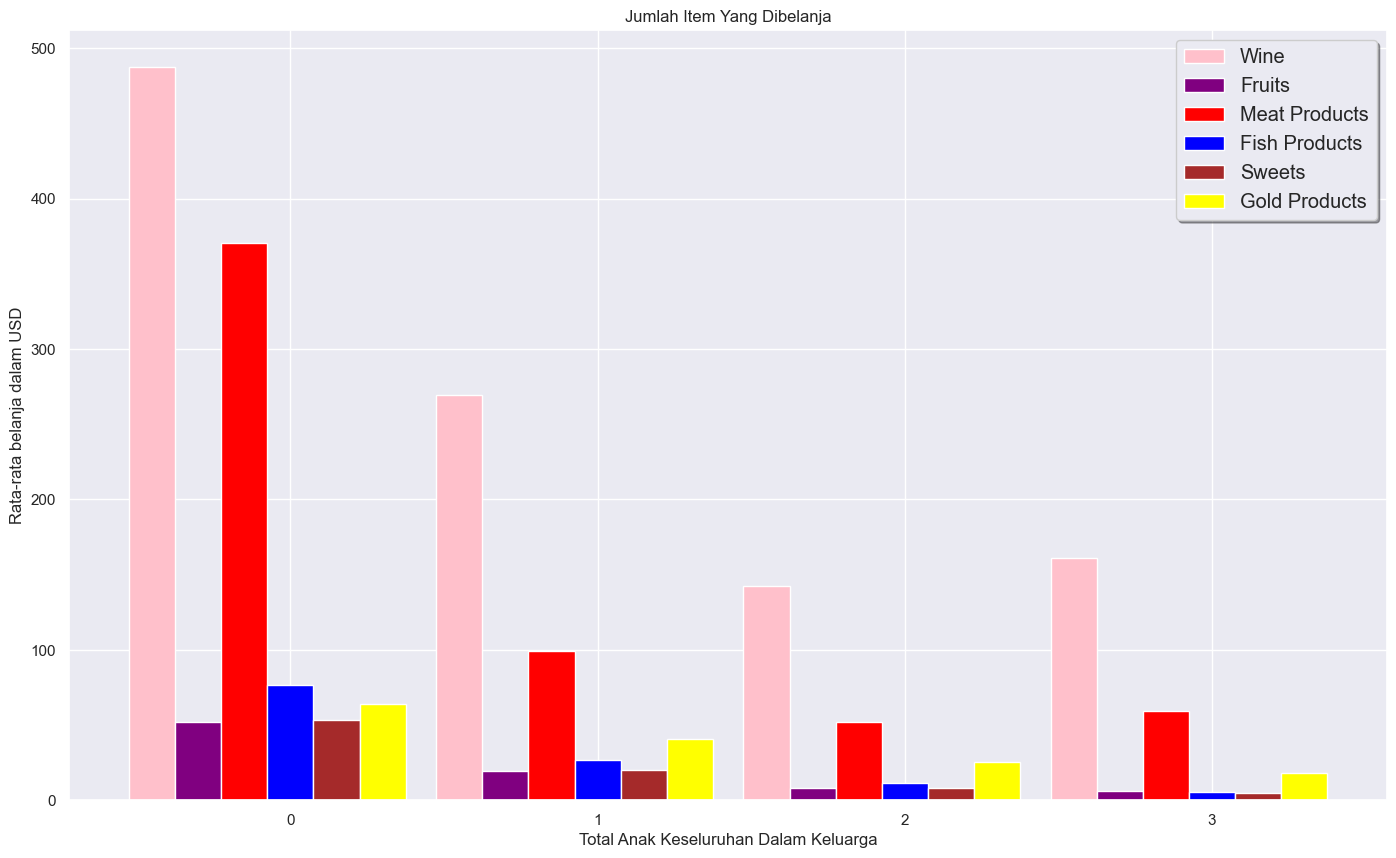

In [1426]:
label=df.groupby('TotalChildren').count()['ID'].index
label

fish_spent=df.groupby('TotalChildren').mean()['MntFishProducts']
fruit_spent=df.groupby('TotalChildren').mean()['MntFruits']
gold_spent=df.groupby('TotalChildren').mean()['MntGoldProds']
meat_spent=df.groupby('TotalChildren').mean()['MntMeatProducts']
sweet_spent=df.groupby('TotalChildren').mean()['MntSweetProducts']
wine_spent=df.groupby('TotalChildren').mean()['MntWines']

xpos=np.arange(len(label))
xpos



plt.figure(figsize=(17,10))
plt.bar(xpos-0.45,wine_spent,width=0.15,label='Wine',color='pink')
plt.bar(xpos-0.3,fruit_spent,width=0.15,label='Fruits',color='purple')
plt.bar(xpos-0.15,meat_spent,width=0.15,label='Meat Products',color='red')
plt.bar(xpos,fish_spent,width=0.15,label='Fish Products',color='blue')
plt.bar(xpos+0.15,sweet_spent,width=0.15,label='Sweets',color='brown')
plt.bar(xpos+0.3,gold_spent,width=0.15,label='Gold Products',color='yellow')

plt.xlabel('Total Anak Keseluruhan Dalam Keluarga')
plt.xticks(xpos,label)
plt.ylabel('Rata-rata belanja dalam USD')
plt.title('Jumlah Item Yang Dibelanja')
plt.legend(loc='best',shadow=True,fontsize='large')

Platform yang paling sering digunakan erdasarkan kelompok usia

In [1427]:
dfPlatformEducation = df.pivot_table(index= ('Education'), 
                     values= ('NumWebPurchases',
                              'NumCatalogPurchases', 
                              'NumStorePurchases'),
                              aggfunc = 'sum'
).sort_values(by= 'NumWebPurchases', ascending=False)

cm = sns.light_palette("blue", as_cmap=True)
dfPlatformEducation.style.background_gradient(cmap=cm)

In [1428]:
dfPlatformAge = df.pivot_table(index= ('Age_Group'), 
                     values= ('NumWebPurchases',
                              'NumCatalogPurchases', 
                              'NumStorePurchases'),
                              aggfunc = 'sum'
).sort_values(by= 'NumWebPurchases', ascending=False)

cm = sns.light_palette("blue", as_cmap=True)
dfPlatformAge.style.background_gradient(cmap=cm)

In [1429]:
dfPlatformAgeEdu = df.pivot_table(index= ('Age_Group', 'Education'), 
                     values= ('NumWebPurchases',
                              'NumCatalogPurchases', 
                              'NumStorePurchases'),
                              aggfunc = 'sum'
).sort_values(by= 'NumWebPurchases', ascending=False)

cm = sns.light_palette("blue", as_cmap=True)
dfPlatformAgeEdu.style.background_gradient(cmap=cm)


<AxesSubplot: xlabel='Age_Group'>

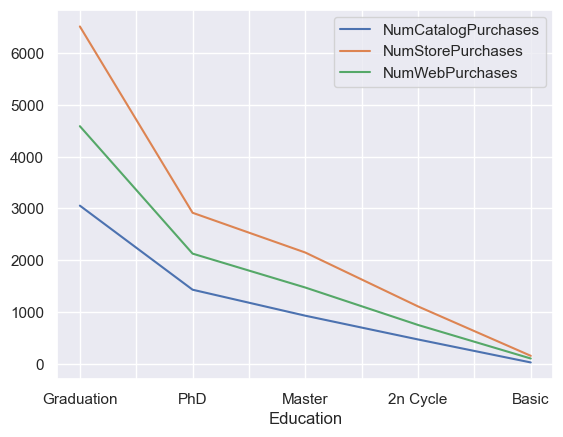

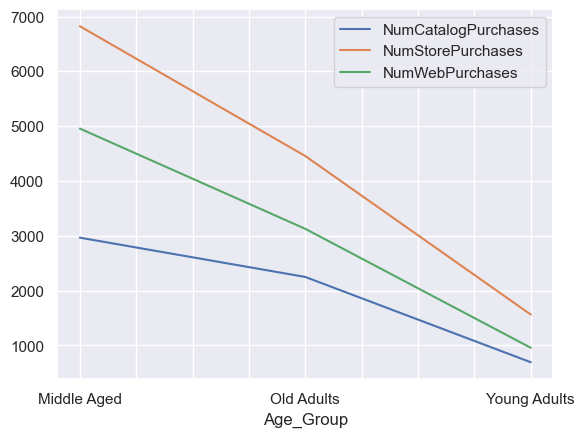

In [1430]:
dfPlatformEducation.plot(),
dfPlatformAge.plot()


<AxesSubplot: xlabel='NumWebVisitsMonth', ylabel='count'>

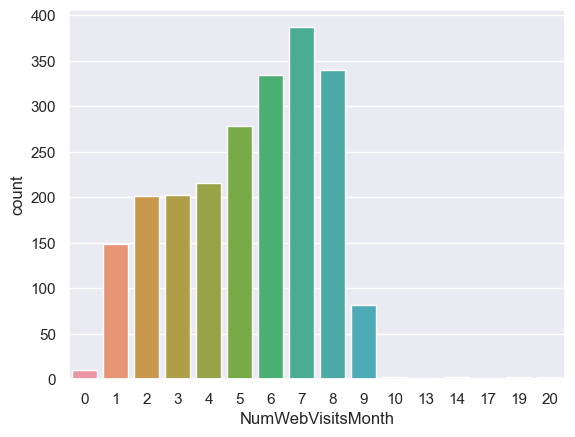

In [1431]:
sns.countplot(x=df['NumWebVisitsMonth'])

In [1432]:
df.groupby(['Age_Group', 'Complain'])['Complain'].agg('count')

Age_Group     Complain
Middle Aged   0           1220
              1           7   
Old Adults    0           678 
              1           9   
Young Adults  0           294 
              1           4   
Name: Complain, dtype: int64

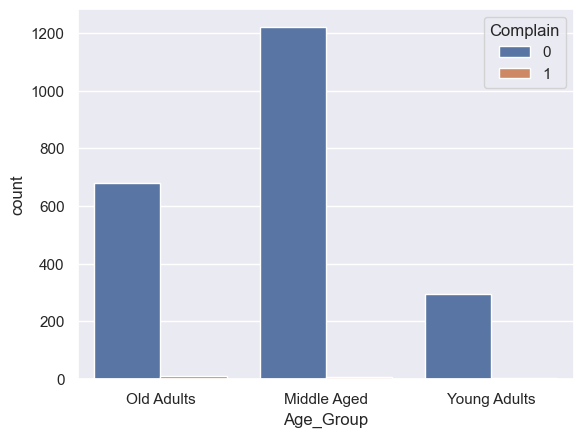

In [1433]:
%matplotlib inline
sns.set(style="darkgrid")
ax = sns.countplot(x='Age_Group', hue="Complain", data=df)
plt.show()

### **Summary**
**1. Group Umur yang memiliki total belanjaan paling banyak** 
* Pelanggan Marketplace X dinominasi oleh kelompok umur `Middle Aged`, yaitu dengan rentang umur dari 40 - 59 Tahun. Tentu saja hal ini membuat hasil dari pembelian setiap produk (Wines, Fruits, Meat, Fish, Sweets, dan Gold) didominasi oleh pelanggan `Middle Aged`, disusul dengan kelompok `Old Adults` (>60 Tahun), dan kemudian kelompok `Young Adults` (<= 39 Tahun).

**2. Perbedaan antara level edukasi dari umur pelanggan dalam berperilaku berbelanja** 
* Pelanggan Marketplace X dengan Level Edukasi `PhD` mendominasi total belanjaan, sedangkan yang paling sedikit melakukan transaksi adalah pelanggan dengan Level Edukasi `Basic`. 
* Pelanggan dengan pembelian **terbanyak** terdapat pada kelompok umur `Middle Aged` dengan `Education` atau Level Edukasi `Graduation`, dimana pembelian terbanyak ada pada produk Wine (`MntWines`) dan produk Daging (`MntMeatProducst`). Sedangkan total pembelian paling **sedikit** ada pada Level Edukasi `Basic` kelompok umur `Old Adults`.
* Dari table Pivot, terlihat bahwa pendapatan yang tinggi atau `Higher Income` dan `Upper Middle Income` cenderung memiliki **total belanjaan yang tinggi**, sedangkan pendapatan rendah atau `Lower Income` dan `Lower Middle Income` cenderung memiliki **total belanjaan yang rendah**.

**3. Perbandingan kategori Item yang dibelanja berdasakan jumlah Anak kecil dan Anak remaja**
- Keluarga yang tidak memiliki anak cenderung menghabiskan uangnya dalam berbelanja, dibandingkan keluarga yang memiliki anak kecil sebanyak 2 anak. Sedangkan apabila dilihat dari total jumlah remaja dalam satu keluarga, pembelian wine terbanyak terjadi pada keluarga yang memiliki anak remaja paling tinggi. Namun, secara keseluruhan, rumah tangga yang tidak memiliki anak sama sekali memiliki pola berbelanja lebih banyak dibanding keluarga yang memiliki jumlah anak 1, 2 dan 3. 

**4. Platform manakah yang paling banyak dan paling sedikit dalam pelanggan untuk melakukan transaksi**
* Pelanggan Marketplace X, kelompok `Middle Aged` , `Old Adults` dan `Young Adults` kebanyakan lebih senang berbelanja dengan data langsung ke Store dibandingkan melalui Website dan Catalog . Selain itu dari keseluruhan platform, yang performa Purchase pelanggan-nya paling rendah adalah berbelanja melalui Catalog. Hal yang sama apabila dilihat dari level edukasi pelanggan (`Graduation, PhD, Master Education, 2nd Cycle dan Basic`), dimana semua-nya lebih dominan untuk berbelanja melalui Store langsung dibandingkan melalui Website dan Catalogue.

**5. Jumlah kunjungan website yang dilakukan pelanggan selama satu bulan terakhir adalah 6 hinggan 8 kali dalam sebulan**

**6. Komplain yang diterima Marketplace X selama penjualan**
* Selama penjualan, komplain yang diterima Marketplace X tergolong sedikit, dimana hanya `7` orang dari total 1220 kelompok umur `Middle Age`, `9` orang dari total 678 kelompok umur `Old Adults` dan `4` orang dari total 294 kelompok umur `Young Adults`.

## **Data Analysis**

Setelah melakukan tahapan *Data Understanding dan Data Cleaning* selanjutnya melakukan analisis bagaimana **karakteristik pelanggan yang menerima tawaran campaign**.

Analisis dilakukan dengan membandingkan data pelanggan yang menerima tawaran diskon (1) dan tidak (0) di campaign pertama hingga terakhir, yaitu ke-6 (`AcceptedCmp1-5` dan `Response`). 


>### Berdasarkan Umur pelanggan Kelompok Umur dari pelanggan: `Age` dan `Age Group`

Pertama, mari kita lihat bagaimana Usia pelanggan terhadap respon yang diberikan selama campaign. Kita akan menganalisis kolom  `Age` dan `Age_Group` : untuk menjawab beberapa pertanyaan.

* Grup umur yang paling banyak menerima tawaran diskon selama campaign?
* Apakah ada perbedaan kelompok umur dalam merespon campaign


In [1434]:
import numpy as np
from scipy import stats

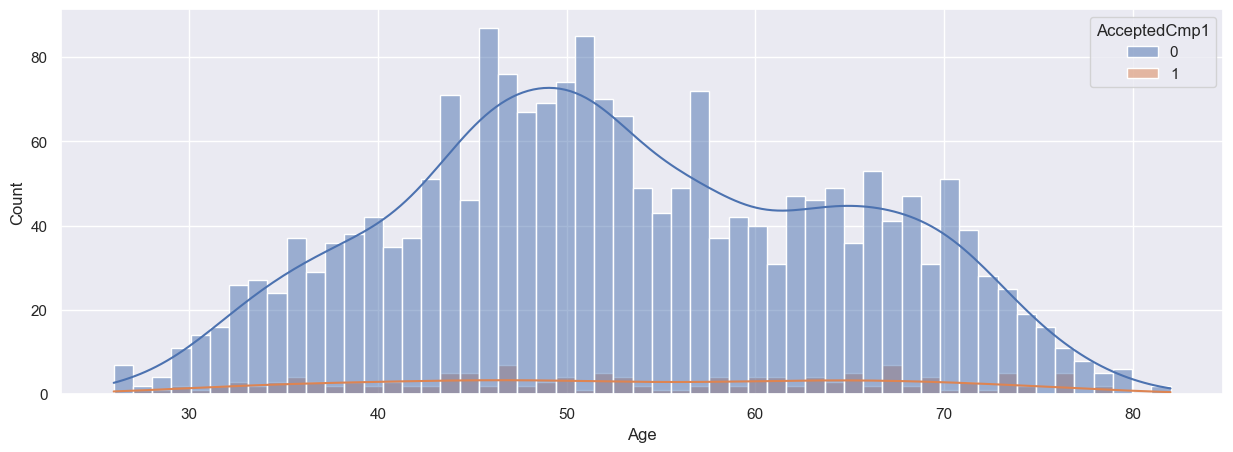

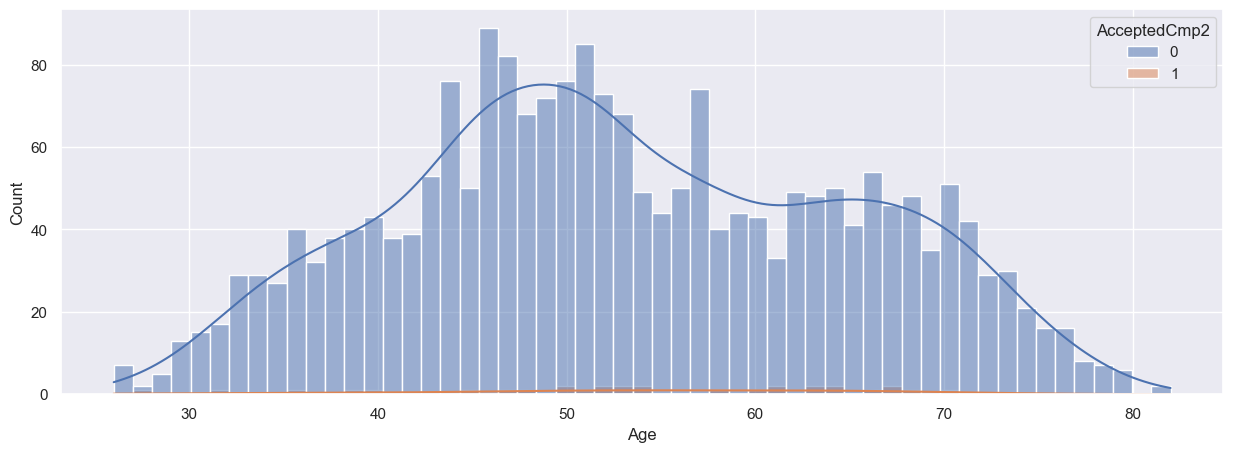

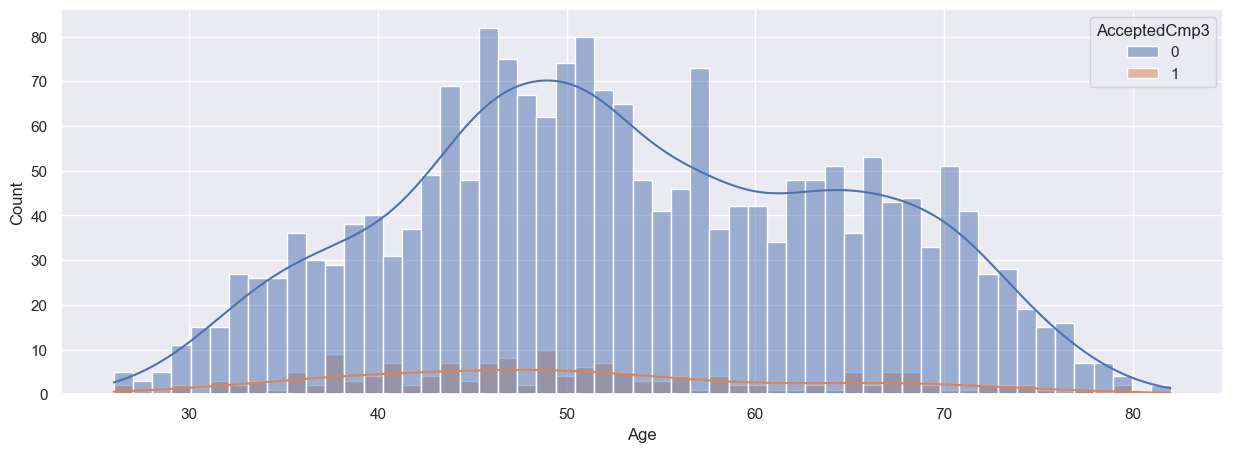

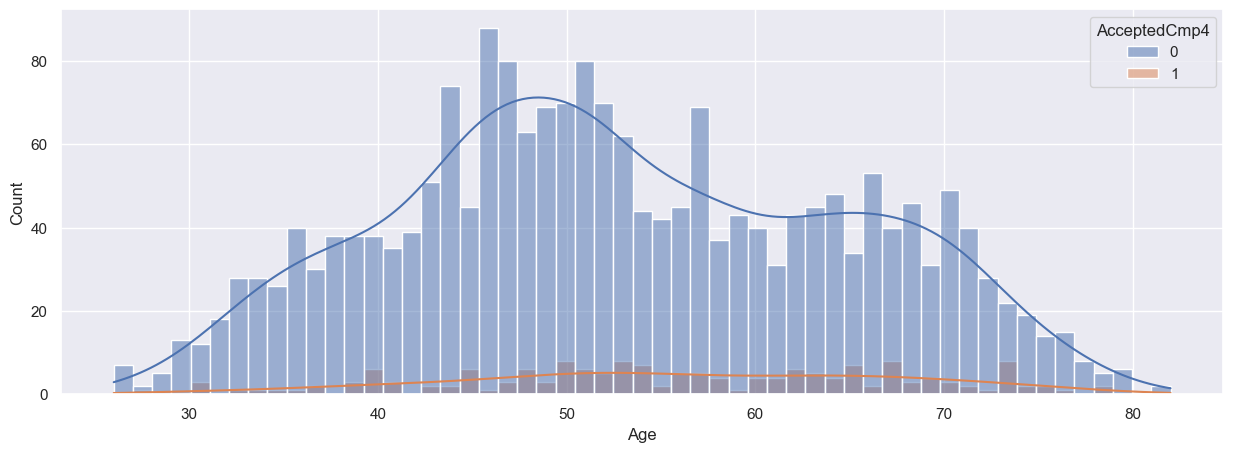

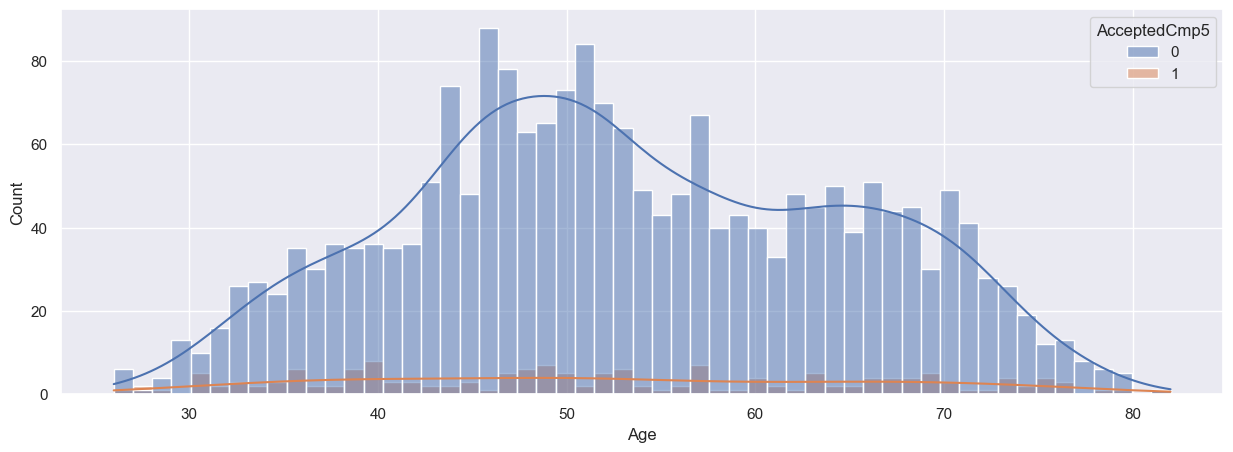

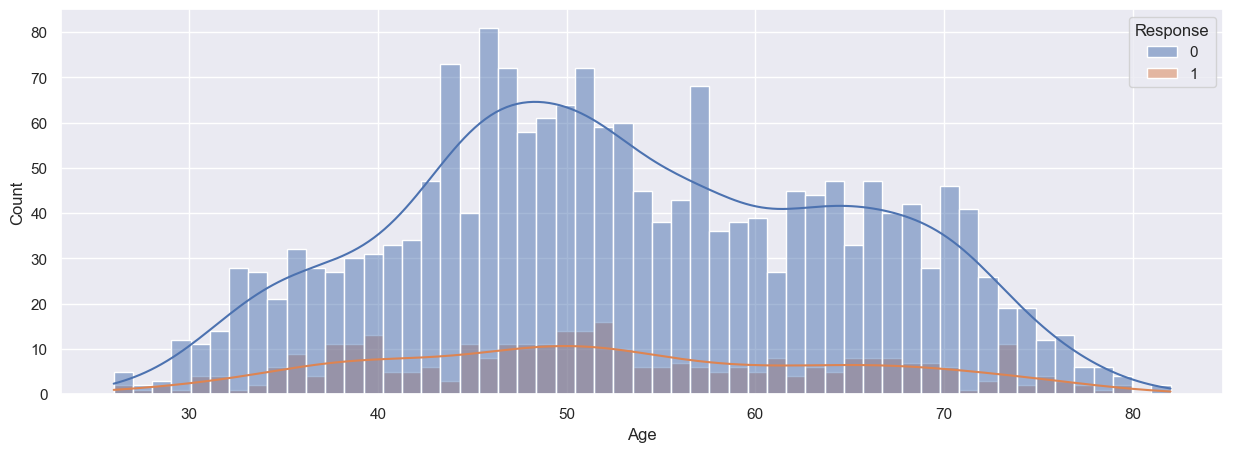

In [1435]:
fig,ax = plt.subplots(figsize=(15,5))
sns.histplot(data=df, x='Age', hue = 'AcceptedCmp1', kde=True, bins=55)
plt.show() 

fig,ax = plt.subplots(figsize=(15,5))
sns.histplot(data=df, x='Age', hue = 'AcceptedCmp2', kde=True, bins=55)
plt.show() 

fig,ax = plt.subplots(figsize=(15,5))
sns.histplot(data=df, x='Age', hue = 'AcceptedCmp3', kde=True, bins=55)
plt.show() 

fig,ax = plt.subplots(figsize=(15,5))
sns.histplot(data=df, x='Age', hue = 'AcceptedCmp4', kde=True, bins=55)
plt.show() 

fig,ax = plt.subplots(figsize=(15,5))
sns.histplot(data=df, x='Age', hue = 'AcceptedCmp5', kde=True, bins=55)
plt.show() 

fig,ax = plt.subplots(figsize=(15,5))
sns.histplot(data=df, x='Age', hue = 'Response', kde=True, bins=55)
plt.show() 


In [1436]:
# cek distribusi kolom Age
from scipy.stats import normaltest
stats, pval=normaltest(df['Age'])
if pval<=0.05:
    print('Distribusi Umur Pelanggan Tidak Normal') #Ha
else: 
    print('Distribusi Umur Pelanggan Normal') #Ho 

Distribusi Umur Pelanggan Tidak Normal


>**Respon Kelompok Umur Terhadap Campaign Pertama**

In [1437]:
px.sunburst(df,path=['Age_Group','AcceptedCmp1'],color='AcceptedCmp1', title=f'Proporsi Menerima Tawaran Campaign Peratama Berdasarkan Age Group')


>**Respon Kelompok Umur Terhadap Campaign Kedua**

In [1438]:
px.sunburst(df,path=['Age_Group','AcceptedCmp2'],color='AcceptedCmp2', title=f'Proporsi Menerima Tawaran Campaign Kedua Berdasarkan Age Group')


>**Respon Kelompok Umur Terhadap Campaign Ketiga**

In [1439]:
px.sunburst(df,path=['Age_Group','AcceptedCmp3'],color='AcceptedCmp3', title=f'Proporsi Menerima Tawaran Campaign Ketiga Berdasarkan Age Group')


>**Respon Kelompok Umur Terhadap Campaign Keempat**

In [1440]:
plt.figure(figsize= (1,1))
px.sunburst(df,path=['Age_Group','AcceptedCmp4'],color='AcceptedCmp4', title=f'Proporsi Menerima Tawaran Campaign Keempat Berdasarkan Age Group')


<Figure size 100x100 with 0 Axes>

>**Respon Kelompok Umur Terhadap Campaign Kelima**

In [1441]:
plt.figure(figsize= (1,1))
px.sunburst(df,path=['Age_Group','AcceptedCmp5'],color='AcceptedCmp5', title=f'Proporsi Menerima Tawaran Campaign Kelima Berdasarkan Age Group')


<Figure size 100x100 with 0 Axes>

>**Respon Kelompok Umur Terhadap Campaign Terakhir**

In [1442]:
plt.figure(figsize= (1,1))
px.sunburst(df,path=['Age_Group','Response'],color='Response', title=f'Proporsi Menerima Tawaran Campaign Terakhir Berdasarkan Age Group')


<Figure size 100x100 with 0 Axes>

In [1443]:
df_AgeGroup_Response_Pivot = df.pivot_table(index = 'Age_Group',
                        values= ('AcceptedCmp1', 
                                  'AcceptedCmp2', 
                                  'AcceptedCmp3', 
                                  'AcceptedCmp4', 
                                  'AcceptedCmp5', 
                                  'Response'),
                        aggfunc= ('sum')
                        )
df_AgeGroup_Response_Pivot

AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
Age_Group                                                              
Middle Aged   59            14            93            83             
Old Adults    56            12            38            68             
Young Adults  27            4             32            13             

              AcceptedCmp5  Response  
Age_Group                             
Middle Aged   72            174       
Old Adults    54            101       
Young Adults  35            58

In [1444]:
score, pval, dof,exp=chi2_contingency(df_AgeGroup_Response_Pivot)
if pval<=0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Tolak Ho


Mayoritas dari pelanggan marketplace adalah pelanggan yang termasuk dalam kategori `Middle Aged`. Namun, meskipun demikian, pelanggan dengan kategori **Middle Aged memiliki ketertarikan terhadap campaign pertama hingga terakhir cenderung lebih rendah dibandingkan kelompok Old Adult dan Young Adult**. Dari hasil uji menggunakan *chi square* mengkonfirmasi kelompok umur memiliki pengaruh terhadap ketertarikan pelanggan terhadap campaign.


>### Berdasarkan Status Pernikahan pelanggan Jumlah Anak dari pelanggan: `Marital_Status` dan `Total Children`

Selanjutnya, mari kita lihat bagaimana Status Pernikahan pelanggan terhadap respon yang diberikan selama campaign. Kita akan menganalisis kolom  `Marital_Status` dan `Children` : untuk menjawab beberapa pertanyaan.

* Status Pernikahan yang paling banyak menerima tawaran diskon selama campaign?
* Apakah ada perbedaan Jumlah Anak yang dimiliki pelanggan dalam merespon campaign

In [1445]:
px.sunburst(df,path=['Marital_Status','AcceptedCmp1'],color='AcceptedCmp1', title=f'Proporsi Menerima Tawaran Campaign Peratama Berdasarkan Status Pernikahan')


In [1446]:
px.sunburst(df,path=['Marital_Status','AcceptedCmp2'],color='AcceptedCmp2', title=f'Proporsi Menerima Tawaran Campaign Kedua Berdasarkan Status Pernikahan')


In [1447]:
px.sunburst(df,path=['Marital_Status','AcceptedCmp3'],color='AcceptedCmp3', title=f'Proporsi Menerima Tawaran Campaign Ketiga Berdasarkan Status Pernikahan')



In [1448]:
px.sunburst(df,path=['Marital_Status','AcceptedCmp4'],color='AcceptedCmp4', title=f'Proporsi Menerima Tawaran Campaign Keempat Berdasarkan Status Pernikahan')



In [1449]:
px.sunburst(df,path=['Marital_Status','AcceptedCmp5'],color='AcceptedCmp5', title=f'Proporsi Menerima Tawaran Campaign Kelima Berdasarkan Status Pernikahan')


In [1450]:
px.sunburst(df,path=['Marital_Status','Response'],color='Response', title=f'Proporsi Menerima Tawaran Campaign Terakhir Berdasarkan Status Pernikahan')


In [1451]:
df_MaritalStatus_Response_Pivot = df.pivot_table(index = 'Marital_Status',
                        values= ('AcceptedCmp1', 
                                  'AcceptedCmp2', 
                                  'AcceptedCmp3', 
                                  'AcceptedCmp4', 
                                  'AcceptedCmp5', 
                                  'Response'),
                        aggfunc= ('sum')
                        )
df_MaritalStatus_Response_Pivot

AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
Marital_Status                                                           
Couple          94            19            100           104            
Single          48            11            63            60             

                AcceptedCmp5  Response  
Marital_Status                          
Couple          109           158       
Single          52            175

In [1452]:
score, pval, dof,exp=chi2_contingency(df_MaritalStatus_Response_Pivot)
if pval<=0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Tolak Ho


In [1453]:
px.sunburst(df,path=['TotalChildren','AcceptedCmp1'],color='AcceptedCmp1', title=f'Proporsi Menerima Tawaran Campaign Pertama Berdasarkan Jumlah Anak')


In [1454]:
px.sunburst(df,path=['TotalChildren','AcceptedCmp2'],color='AcceptedCmp2', title=f'Proporsi Menerima Tawaran Campaign Kedua Berdasarkan Jumlah Anak')


In [1455]:
px.sunburst(df,path=['TotalChildren','AcceptedCmp3'],color='AcceptedCmp3', title=f'Proporsi Menerima Tawaran Campaign Ketiga Berdasarkan Jumlah Anak')


In [1456]:
px.sunburst(df,path=['TotalChildren','AcceptedCmp4'],color='AcceptedCmp4', title=f'Proporsi Menerima Tawaran Campaign Keempat Berdasarkan Jumlah Anak')


In [1457]:
px.sunburst(df,path=['TotalChildren','AcceptedCmp5'],color='AcceptedCmp5', title=f'Proporsi Menerima Tawaran Campaign Kelima Berdasarkan Jumlah Anak')


In [1458]:
px.sunburst(df,path=['TotalChildren','Response'],color='Response', title=f'Proporsi Menerima Tawaran Campaign Terakhir Berdasarkan Jumlah Anak')


In [1459]:
df_TotalChildren_Response_Pivot = df.pivot_table(index = 'TotalChildren',
                        values= ('AcceptedCmp1', 
                                  'AcceptedCmp2', 
                                  'AcceptedCmp3', 
                                  'AcceptedCmp4', 
                                  'AcceptedCmp5', 
                                  'Response'),
                        aggfunc= ('sum')
                        )
df_TotalChildren_Response_Pivot

AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
TotalChildren                                                           
0              109           18            48            67             
1              27            9             85            79             
2              4             3             29            16             
3              2             0             1             2              

               AcceptedCmp5  Response  
TotalChildren                          
0              136           168       
1              21            116       
2              3             47        
3              1             2

In [1460]:
score, pval, dof,exp=chi2_contingency(df_TotalChildren_Response_Pivot)
if pval<=0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Tolak Ho


### 1. Berdasarkan **Status Pernikahan**

Mayoritas dari pelanggan marketplace X apabila dilihat dari status pernikahan adalah yang berstatus `Couple` atau yang sudah memiliki pasangan, sedangkan yang tidak memiliki pangangan atau `Single` berjumlah setengah atau lebih dari pelanggan yang sudah berpasangan. Namun, meskipun demikian, **pelanggan yang berstatus `Couple` memiliki ketertarikan terhadap campaign pertama hingga terakhir cenderung sama dengan yang berstatus `Single`, dan bahkan pada beberapa campaign lebih rendah dibandingkan pelanggan yang berstatus `Single`**. Dari hasil uji menggunakan *chi square* mengkonfirmasi status pernikahan memiliki pengaruh terhadap ketertarikan pelanggan terhadap campaign.

### 1. Berdasarkan **Jumlah Anak Yang Dimiliki**
Mayoritas dari pelanggan marketplace X apabila dilihat dari jumlah anak yang dimiliki adalah yang memiliki `1`. Namun, meskipun demikian, **pelanggan yang memiliki jumlah anak `1`  memiliki ketertarikan terhadap campaign pertama hingga terakhir cenderung lebih rendah dibandingkan yang lainnya,  sedangkan yang memiliki ketertarikan paling banyak adalah pelanggan yang tidak memiliki anak**. Dari hasil uji menggunakan *chi square* mengkonfirmasi jumlah anak memiliki pengaruh terhadap ketertarikan pelanggan terhadap campaign.

>### Berdasarkan Status Pernikahan pelanggan Jumlah Anak dari pelanggan: `Income` dan `Income_Group`

Terakhir, kita akan melihat bagaimana Status Pernikahan pelanggan terhadap respon yang diberikan selama campaign. Kita akan menganalisis kolom  `Income` dan `Income_Group` : untuk menjawab beberapa pertanyaan.

* Group Income manakah yang paling banyak menerima tawaran diskon selama campaign?
* Apakah ada perbedaan Total Income yang dimiliki pelanggan dalam merespon campaign

In [1461]:
px.sunburst(df,path=['Income_Group','AcceptedCmp1'],color='AcceptedCmp1', title=f'Proporsi Menerima Tawaran Campaign Peratama Berdasarkan Income Group ')


In [1462]:
px.sunburst(df,path=['Income_Group','AcceptedCmp2'],color='AcceptedCmp2', title=f'Proporsi Menerima Tawaran Campaign Kedua Berdasarkan Income Group ')


In [1463]:
px.sunburst(df,path=['Income_Group','AcceptedCmp3'],color='AcceptedCmp3', title=f'Proporsi Menerima Tawaran Campaign Ketiga Berdasarkan Income Group ')

In [1464]:
px.sunburst(df,path=['Income_Group','AcceptedCmp4'],color='AcceptedCmp4', title=f'Proporsi Menerima Tawaran Campaign Keempat Berdasarkan Income Group ')

In [1465]:
px.sunburst(df,path=['Income_Group','AcceptedCmp5'],color='AcceptedCmp5', title=f'Proporsi Menerima Tawaran Campaign Kelima Berdasarkan Income Group ')

In [1466]:
px.sunburst(df,path=['Income_Group','Response'],color='Response', title=f'Proporsi Menerima Tawaran Campaign Terakhir Berdasarkan Income Group ')

In [1467]:
fig=px.sunburst(df,path=['Income_Group','Response'],color='Response', title=f'Proporsi Menerima Tawaran Campaign Terakhir Berdasarkan Income Group ')


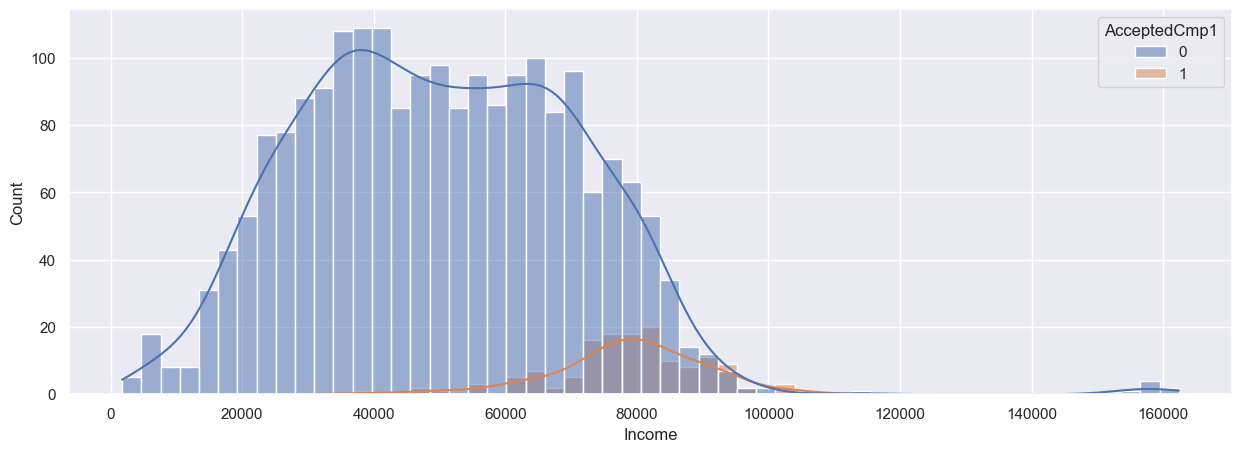

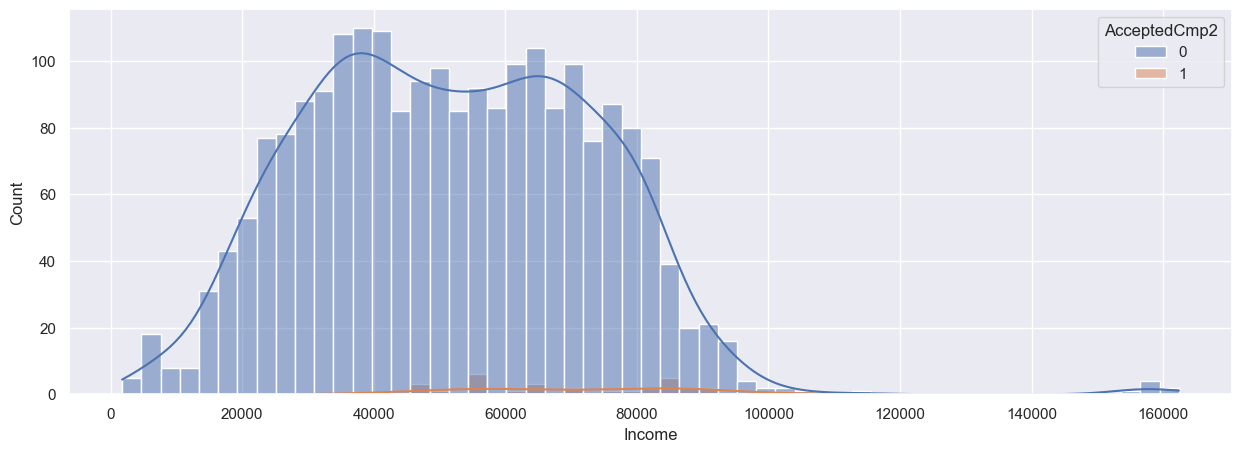

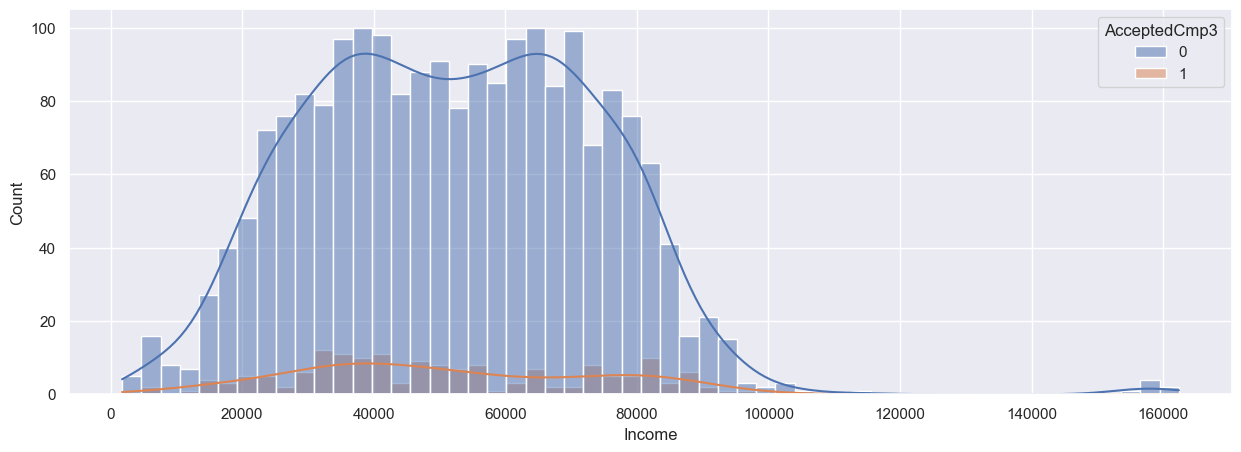

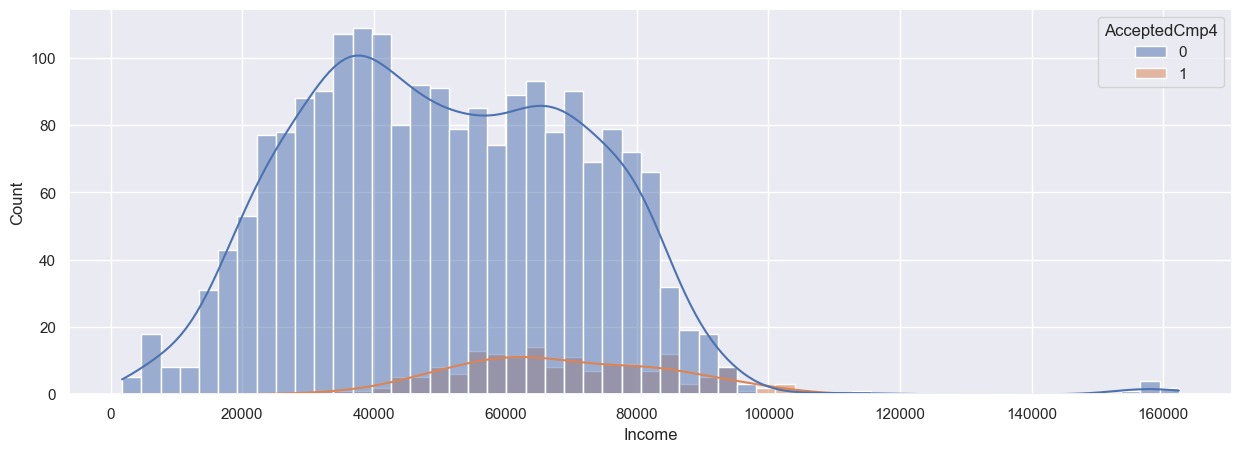

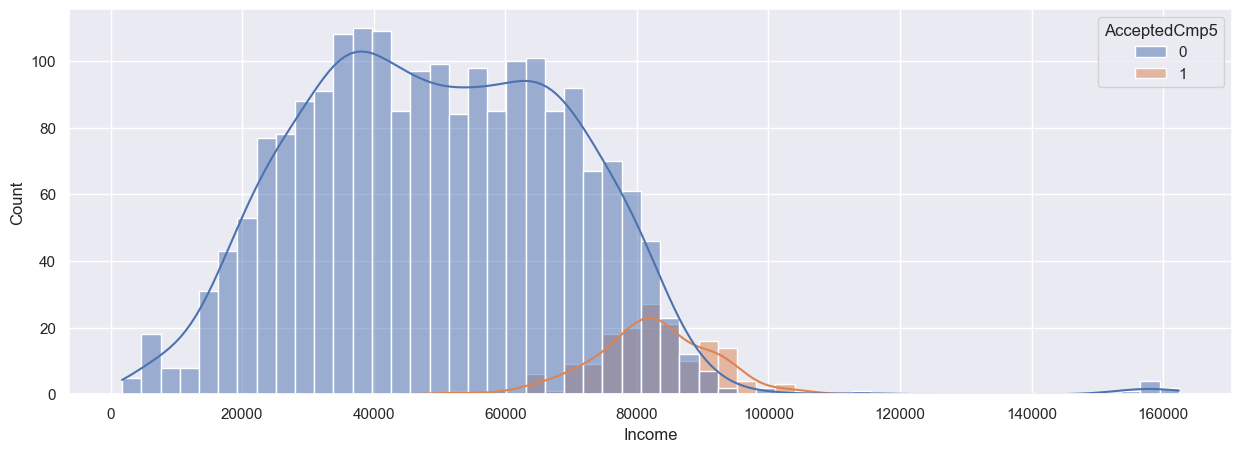

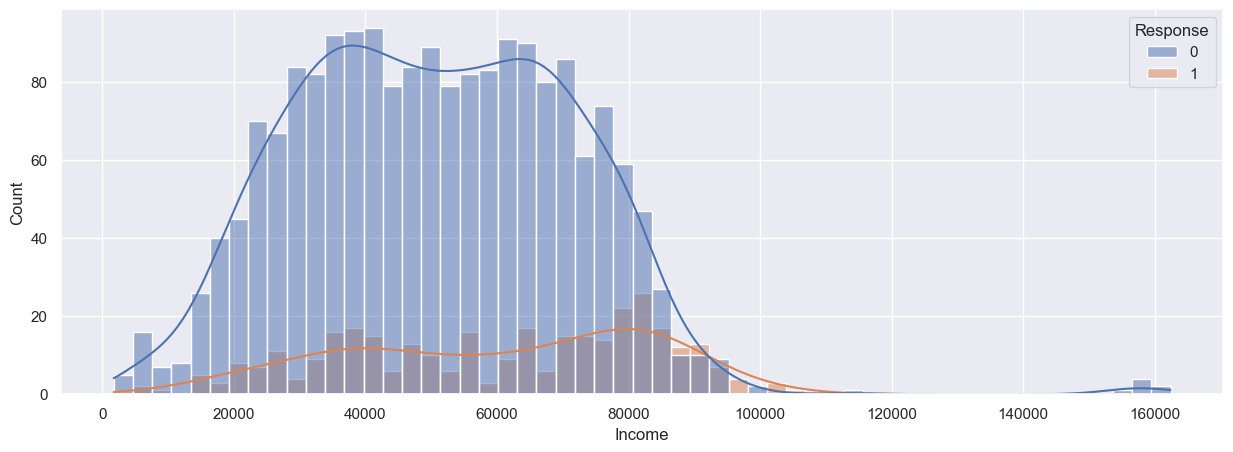

In [1468]:
fig,ax = plt.subplots(figsize=(15,5))
sns.histplot(data=df, x='Income', hue = 'AcceptedCmp1', kde=True, bins=55)
plt.show() 

fig,ax = plt.subplots(figsize=(15,5))
sns.histplot(data=df, x='Income', hue = 'AcceptedCmp2', kde=True, bins=55)
plt.show() 

fig,ax = plt.subplots(figsize=(15,5))
sns.histplot(data=df, x='Income', hue = 'AcceptedCmp3', kde=True, bins=55)
plt.show() 

fig,ax = plt.subplots(figsize=(15,5))
sns.histplot(data=df, x='Income', hue = 'AcceptedCmp4', kde=True, bins=55)
plt.show() 

fig,ax = plt.subplots(figsize=(15,5))
sns.histplot(data=df, x='Income', hue = 'AcceptedCmp5', kde=True, bins=55)
plt.show() 

fig,ax = plt.subplots(figsize=(15,5))
sns.histplot(data=df, x='Income', hue = 'Response', kde=True, bins=55)
plt.show() 

In [1469]:
df_IncomeGroup_Response_Pivot = df.pivot_table(index = 'Income_Group',
                        values= ('AcceptedCmp1', 
                                  'AcceptedCmp2', 
                                  'AcceptedCmp3', 
                                  'AcceptedCmp4', 
                                  'AcceptedCmp5', 
                                  'Response'),
                        aggfunc= ('sum')
                        )
df_IncomeGroup_Response_Pivot

AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
Income_Group                                                                  
High Income          99            14            33            59             
Low Income           0             0             7             0              
Low Middle Income    0             0             20            0              
Upper Middle Income  43            16            103           105            

                     AcceptedCmp5  Response  
Income_Group                                 
High Income          133           119       
Low Income           0             8         
Low Middle Income    0             33        
Upper Middle Income  28            173

In [1470]:
score, pval, dof,exp=chi2_contingency(df_IncomeGroup_Response_Pivot)
if pval<=0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')


Tolak Ho


Mayoritas dari pelanggan makertplace X apabila dilihat dari Jumlah Income adalah yang memiliki kategori penghasilan `Upper Middle Income`. Namun, meskipun demikian, **pelanggan yang memiliki penghasilan `Upper Middle Income` memiliki ketertarikan terhadap campaign pertama hingga terakhir cenderung lebih rendah dibanding lainnya, sedangkan yang memiliki ketertarikan paling tinggi adalah pelanggan yang memiliki kategori penghasilan `High Income`**. Dari hasil uji menggunakan *chi square* mengkonfirmasi total pendapatan memiliki pengaruh terhadap ketertarikan pelanggan terhadap campaign.

Dari grafik histogram diatas, dapat terlihat adanya kecendrungan bahwa pelanggan dengan income yang tinggi memiliki ketertarikan terhadap tawaran dari campaign


## Selanjutnya menganalisa pada dibulan apa pelangan lebih banyak melakukan pembayaran menggunakan diskon, menggunakan Dt_Customer, kemudian membuatan kolom baru `Month` dan `Year`

In [1471]:
# Membuat kolom 'Year' dan 'Month' 
df['Year'] = df["Dt_Customer"].dt.year
df['Month'] = df["Dt_Customer"].dt.month

In [1472]:
df2=df

# number of purchases made with discount according to month
custom_dict = {'Jan':0, 'Feb':1, 'Mar':2, 'Apr':3, 'May':4, 'Jun':5,
               'Jul':6, 'Aug':7, 'Sep':8, 'Oct':9, 'Nov':10, 'Dec':11}
temp_data = df2.copy()
temp_data.Month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)

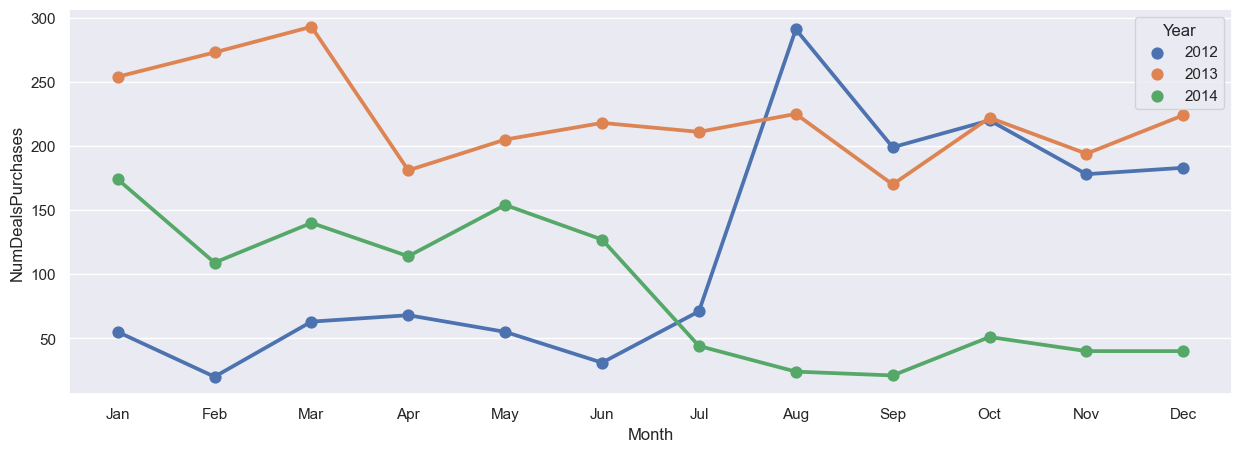

In [1473]:
df2 = temp_data[['Month', 'Year', "NumDealsPurchases"]].groupby(["Year","Month"]).sum().reset_index().sort_values(by=['Year','Month', 'NumDealsPurchases'], ascending=False)
df2 = df2.iloc[df2['Month'].map(custom_dict).argsort()]
f, ax=plt.subplots(figsize=(15, 5))
sns.pointplot(x='Month', y="NumDealsPurchases", data=df2, hue="Year")
plt.show()

Terlihat bahwa permorma pelanggan menggunakan diskon dalam berbelanja banyak dilakukan di tahun 2013 dan cenderung stabil. Namun terjadi penurunan selama tahun 2014. 

## Clustering Pelanggan berdasarkan `Income_Group` dan `TotalPurchasedItems`

Clustering dilakukan dengan mengelompokkan pelanggan ke dalam satu grup, yaitu grup *Silver*, *Gold*, dan *Platinum*. Pengelompokkan dibagi berdasarkan kelompok pendapatan pelanggan, kemudian setiap `Income_Group` dilakukan clustering berdasarkan `TotalPurchasedItems`. Clustering dilakukan berdasarkan `Income_Group` dikarenakan pada informasi sebelumnya didapat bahwa semakin tinggi pendapatan, semakin tinggi juga jumlah pembelian. 

In [1474]:
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

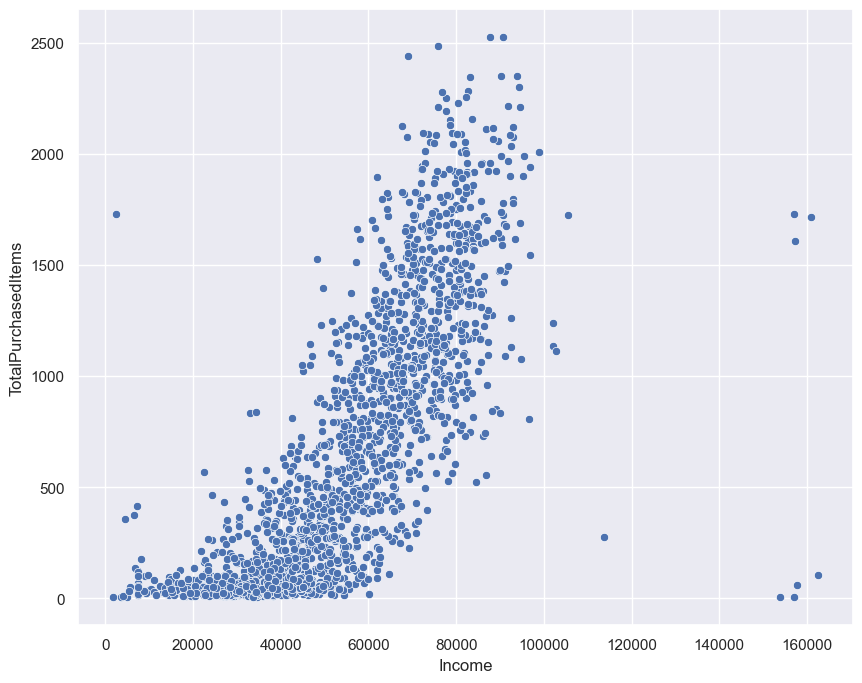

In [1475]:
plt.figure(figsize= (10,8))
sns.scatterplot(data=df, x='Income', y='TotalPurchasedItems')
plt.savefig('Higher Income Higher Spent.png')

### Clustering `Low Income`

In [1476]:
Low_Income_Cluster = df[df['Income_Group'] == 'Low Income']
Low_Income_Cluster.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
9   5899  1950        PhD         Couple         5648.0   1        1          
11  387   1976        Basic       Couple         7500.0   0        0          
21  5376  1979        Graduation  Couple         2447.0   1        0          
30  6864  1989        Master      Single         10979.0  0        0          
44  2139  1975        Master      Couple         7500.0   1        0          

   Dt_Customer  Recency  MntWines  ...  Complain  Response  Age     Age_Group  \
9  2014-03-13   68       28        ...  0         0         72   Old Adults     
11 2012-11-13   59       6         ...  0         0         46   Middle Aged    
21 2013-06-01   42       1         ...  0         0         43   Middle Aged    
30 2014-05-22   34       8         ...  0         0         33   Young Adults   
44 2013-02-10   19       3         ...  0         0         47   Middle Aged    

    TotalPurchasedItems  Income_Group  Family_Members  TotalChildren  Year  \
9   49                   Low Income    4               2              2014   
11  61                   Low Income    2               0              2012   
21  1730                 Low Income    3               1              2013   
30  30                   Low Income    1               0              2014   
44  31                   Low Income    3               1              2013   

    Month  
9   3      
11  11     
21  6      
30  5      
44  2      

[5 rows x 35 columns]

In [1477]:
Low_Income_Cluster['Purchased_Rate'] = (Low_Income_Cluster['TotalPurchasedItems']/Low_Income_Cluster['TotalPurchasedItems'].sum())*100
Low_Income_Cluster.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
9   5899  1950        PhD         Couple         5648.0   1        1          
11  387   1976        Basic       Couple         7500.0   0        0          
21  5376  1979        Graduation  Couple         2447.0   1        0          
30  6864  1989        Master      Single         10979.0  0        0          
44  2139  1975        Master      Couple         7500.0   1        0          

   Dt_Customer  Recency  MntWines  ...  Response  Age     Age_Group  \
9  2014-03-13   68       28        ...  0         72   Old Adults     
11 2012-11-13   59       6         ...  0         46   Middle Aged    
21 2013-06-01   42       1         ...  0         43   Middle Aged    
30 2014-05-22   34       8         ...  0         33   Young Adults   
44 2013-02-10   19       3         ...  0         47   Middle Aged    

    TotalPurchasedItems  Income_Group  Family_Members  TotalChildren  Year  \
9   49                   Low Income    4               2              2014   
11  61                   Low Income    2               0              2012   
21  1730                 Low Income    3               1              2013   
30  30                   Low Income    1               0              2014   
44  31                   Low Income    3               1              2013   

    Month  Purchased_Rate  
9   3      0.793009        
11  11     0.987215        
21  6      27.998058       
30  5      0.485515        
44  2      0.501699        

[5 rows x 36 columns]

In [1478]:
clustering1 = KMeans(n_clusters=3)
clustering1.fit(Low_Income_Cluster[['Purchased_Rate']])

KMeans(n_clusters=3)

In [1479]:
clustering1.labels_

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [1480]:
Low_Income_Cluster['Purchased_Total_Cluster'] = clustering1.labels_
Low_Income_Cluster.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
9   5899  1950        PhD         Couple         5648.0   1        1          
11  387   1976        Basic       Couple         7500.0   0        0          
21  5376  1979        Graduation  Couple         2447.0   1        0          
30  6864  1989        Master      Single         10979.0  0        0          
44  2139  1975        Master      Couple         7500.0   1        0          

   Dt_Customer  Recency  MntWines  ...  Age     Age_Group  \
9  2014-03-13   68       28        ...  72   Old Adults     
11 2012-11-13   59       6         ...  46   Middle Aged    
21 2013-06-01   42       1         ...  43   Middle Aged    
30 2014-05-22   34       8         ...  33   Young Adults   
44 2013-02-10   19       3         ...  47   Middle Aged    

    TotalPurchasedItems  Income_Group  Family_Members  TotalChildren  Year  \
9   49                   Low Income    4               2              2014   
11  61                   Low Income    2               0              2012   
21  1730                 Low Income    3               1              2013   
30  30                   Low Income    1               0              2014   
44  31                   Low Income    3               1              2013   

    Month  Purchased_Rate  Purchased_Total_Cluster  
9   3      0.793009        0                        
11  11     0.987215        0                        
21  6      27.998058       1                        
30  5      0.485515        0                        
44  2      0.501699        0                        

[5 rows x 37 columns]

In [1481]:
Low_Income_Cluster['Purchased_Total_Cluster'].value_counts()

0    63
2    3 
1    1 
Name: Purchased_Total_Cluster, dtype: int64

In [1482]:
clustering1.inertia_

20.278067808189633

In [1483]:
inertia_scores = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(Low_Income_Cluster[['Income']])
    inertia_scores.append(kmeans.inertia_)

In [1484]:
inertia_scores

[1083690690.477612,
 212070780.73566306,
 100642288.95949075,
 50026140.75789474,
 30406725.036745608,
 20815316.521212123,
 13879083.458712123,
 10688730.69245338,
 8734790.004166666,
 6488286.612824676]

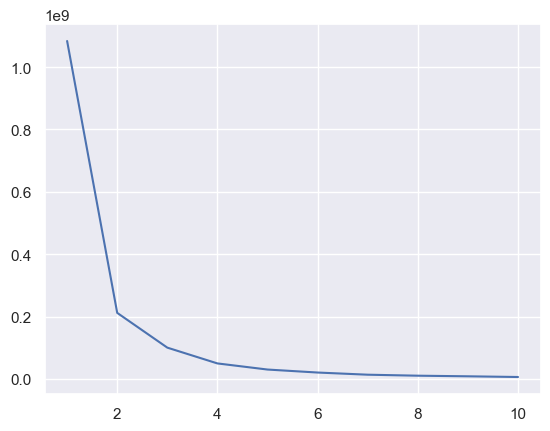

In [1485]:
plt.plot(range(1,11),inertia_scores)

In [1486]:
Low_Income_Cluster.groupby('Purchased_Total_Cluster')['Income', 'TotalPurchasedItems','Purchased_Rate'].mean()

Income  TotalPurchasedItems  Purchased_Rate
Purchased_Total_Cluster                                                  
0                        11266.68254  52.396825            0.847982      
1                        2447.00000   1730.000000          27.998058     
2                        6044.00000   382.666667           6.193019

In [1487]:
clustering11 = KMeans(n_clusters=4)
clustering11.fit(Low_Income_Cluster[['Purchased_Rate','TotalPurchasedItems']])
Low_Income_Cluster['Income_And_Purchased_Cluster'] = clustering11.labels_

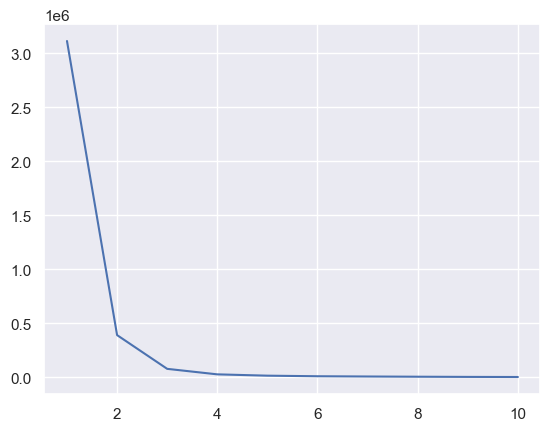

In [1488]:
inertia_scores11 = []

for i in range(1,11):
    kmeans11 = KMeans(n_clusters=i)
    kmeans11.fit(Low_Income_Cluster[['Purchased_Rate','TotalPurchasedItems']])
    inertia_scores11.append(kmeans11.inertia_)
plt.plot(range(1,11),inertia_scores11)

In [1489]:
clustering11.cluster_centers_

array([[5.90710471e-01, 3.65000000e+01],
       [2.79980579e+01, 1.73000000e+03],
       [6.19301937e+00, 3.82666667e+02],
       [1.67125209e+00, 1.03266667e+02]])

<AxesSubplot: xlabel='Income', ylabel='Purchased_Rate'>

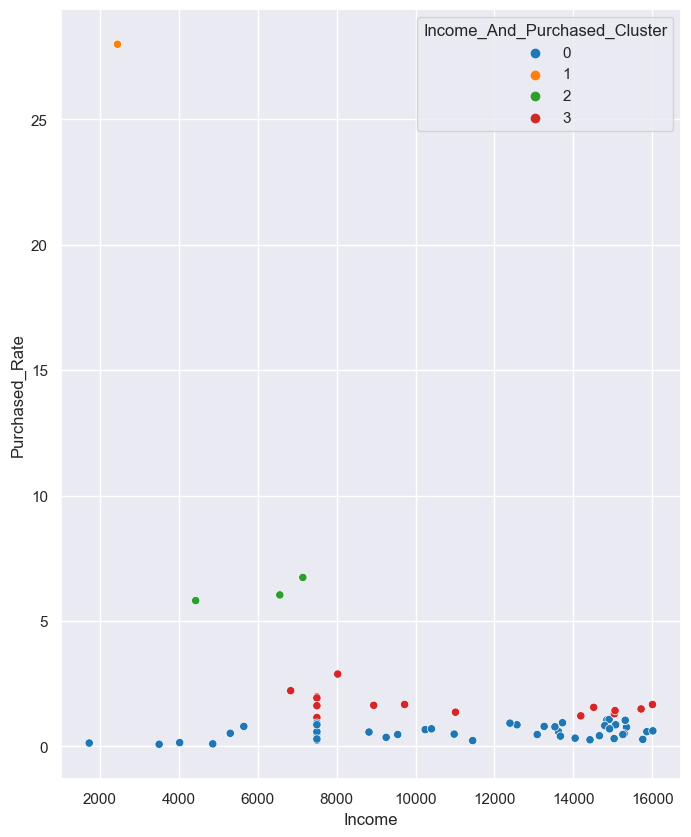

In [1490]:
plt.figure(figsize= (8,10))
sns.scatterplot(data=Low_Income_Cluster, x='Income', y='Purchased_Rate', hue='Income_And_Purchased_Cluster', palette='tab10')

Kita akan mengganti angka 0-3 menjadi :
- 0 = Bronze
- 3 = Silver
- 2 = Gold
- 1 = Platinum

In [1491]:
Low_Income_Cluster.Income_And_Purchased_Cluster.replace({   
    0 : 'Bronze',
    3 : 'Silver',
    2 : 'Gold',
    1 : 'Platinum',
}, inplace=True)

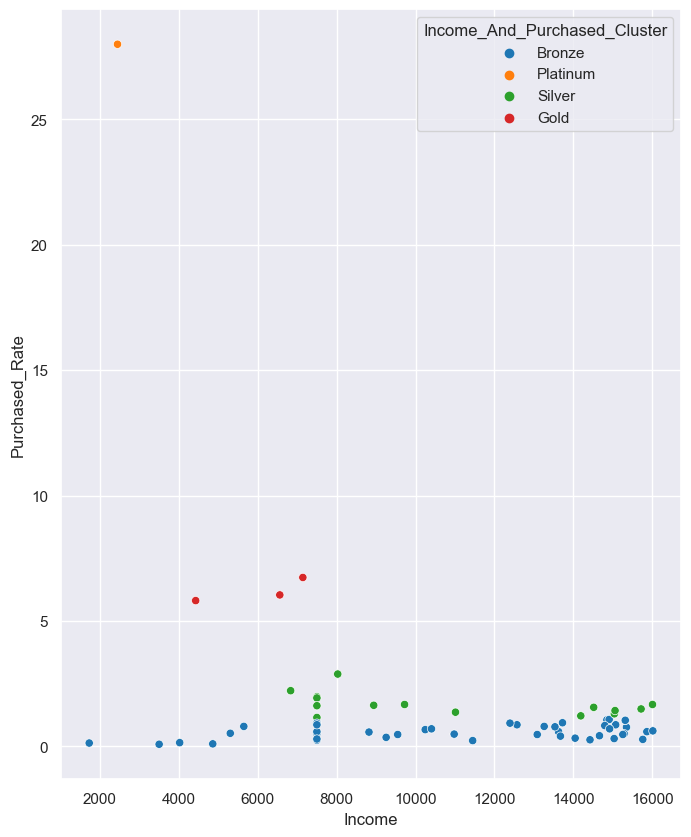

In [1492]:
plt.figure(figsize= (8,10))
sns.scatterplot(data=Low_Income_Cluster, x='Income', y='Purchased_Rate', hue='Income_And_Purchased_Cluster', palette='tab10')
plt.savefig('Clustering Low Income.png')

### Clustering `Low Middle Income`

In [1493]:
LowMiddle_Income_Cluster = df[df['Income_Group'] == 'Low Middle Income']
LowMiddle_Income_Cluster.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
3   6182   1984        Graduation  Couple         26646.0  1        0          
8   4855   1974        PhD         Couple         30351.0  1        0          
14  2569   1987        Graduation  Couple         17323.0  0        0          
25  7892   1969        Graduation  Single         18589.0  0        0          
37  10755  1976        2n Cycle    Couple         23718.0  1        0          

   Dt_Customer  Recency  MntWines  ...  Complain  Response  Age     Age_Group  \
3  2014-10-02   26       11        ...  0         0         38   Young Adults   
8  2013-06-06   19       14        ...  0         1         48   Middle Aged    
14 2012-10-10   38       3         ...  0         0         35   Young Adults   
25 2013-02-01   89       6         ...  0         0         53   Middle Aged    
37 2013-02-09   76       6         ...  0         0         46   Middle Aged    

    TotalPurchasedItems       Income_Group  Family_Members  TotalChildren  \
3   53                   Low Middle Income  3               1               
8   46                   Low Middle Income  3               1               
14  46                   Low Middle Income  2               0               
25  75                   Low Middle Income  1               0               
37  81                   Low Middle Income  3               1               

    Year  Month  
3   2014  10     
8   2013  6      
14  2012  10     
25  2013  2      
37  2013  2      

[5 rows x 35 columns]

In [1494]:
LowMiddle_Income_Cluster['Purchased_Rate'] = (LowMiddle_Income_Cluster['TotalPurchasedItems']/LowMiddle_Income_Cluster['TotalPurchasedItems'].sum())*100
LowMiddle_Income_Cluster.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
3   6182   1984        Graduation  Couple         26646.0  1        0          
8   4855   1974        PhD         Couple         30351.0  1        0          
14  2569   1987        Graduation  Couple         17323.0  0        0          
25  7892   1969        Graduation  Single         18589.0  0        0          
37  10755  1976        2n Cycle    Couple         23718.0  1        0          

   Dt_Customer  Recency  MntWines  ...  Response  Age     Age_Group  \
3  2014-10-02   26       11        ...  0         38   Young Adults   
8  2013-06-06   19       14        ...  1         48   Middle Aged    
14 2012-10-10   38       3         ...  0         35   Young Adults   
25 2013-02-01   89       6         ...  0         53   Middle Aged    
37 2013-02-09   76       6         ...  0         46   Middle Aged    

    TotalPurchasedItems       Income_Group  Family_Members  TotalChildren  \
3   53                   Low Middle Income  3               1               
8   46                   Low Middle Income  3               1               
14  46                   Low Middle Income  2               0               
25  75                   Low Middle Income  1               0               
37  81                   Low Middle Income  3               1               

    Year  Month  Purchased_Rate  
3   2014  10     0.245404        
8   2013  6      0.212993        
14  2012  10     0.212993        
25  2013  2      0.347270        
37  2013  2      0.375052        

[5 rows x 36 columns]

In [1495]:
clustering2 = KMeans(n_clusters=3)
clustering2.fit(LowMiddle_Income_Cluster[['Purchased_Rate']])

KMeans(n_clusters=3)

In [1496]:
clustering2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0,

In [1497]:
LowMiddle_Income_Cluster['Purchased_Total_Cluster'] = clustering2.labels_
LowMiddle_Income_Cluster.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
3   6182   1984        Graduation  Couple         26646.0  1        0          
8   4855   1974        PhD         Couple         30351.0  1        0          
14  2569   1987        Graduation  Couple         17323.0  0        0          
25  7892   1969        Graduation  Single         18589.0  0        0          
37  10755  1976        2n Cycle    Couple         23718.0  1        0          

   Dt_Customer  Recency  MntWines  ...  Age     Age_Group  \
3  2014-10-02   26       11        ...  38   Young Adults   
8  2013-06-06   19       14        ...  48   Middle Aged    
14 2012-10-10   38       3         ...  35   Young Adults   
25 2013-02-01   89       6         ...  53   Middle Aged    
37 2013-02-09   76       6         ...  46   Middle Aged    

    TotalPurchasedItems       Income_Group  Family_Members  TotalChildren  \
3   53                   Low Middle Income  3               1               
8   46                   Low Middle Income  3               1               
14  46                   Low Middle Income  2               0               
25  75                   Low Middle Income  1               0               
37  81                   Low Middle Income  3               1               

    Year  Month  Purchased_Rate  Purchased_Total_Cluster  
3   2014  10     0.245404        0                        
8   2013  6      0.212993        0                        
14  2012  10     0.212993        0                        
25  2013  2      0.347270        0                        
37  2013  2      0.375052        0                        

[5 rows x 37 columns]

In [1498]:
LowMiddle_Income_Cluster['Purchased_Total_Cluster'].value_counts()

0    287
2    28 
1    6  
Name: Purchased_Total_Cluster, dtype: int64

In [1499]:
clustering2.inertia_

5.988089949948266

In [1500]:
inertia_scores2 = []

for i in range(1,11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(LowMiddle_Income_Cluster[['Income']])
    inertia_scores2.append(kmeans2.inertia_)

In [1501]:
inertia_scores2

[4943382742.809969,
 1359653349.3138163,
 571057082.3251722,
 326162494.5504643,
 221548741.49583495,
 146967308.3734033,
 108400676.50481024,
 78083803.5682758,
 54811089.01304611,
 44589717.7281978]

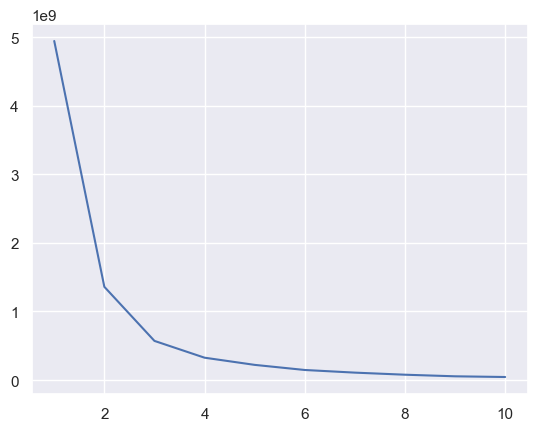

In [1502]:
plt.plot(range(1,11),inertia_scores2)

In [1503]:
LowMiddle_Income_Cluster.groupby('Purchased_Total_Cluster')['Income', 'TotalPurchasedItems','Purchased_Rate'].mean()

Income  TotalPurchasedItems  Purchased_Rate
Purchased_Total_Cluster                                                   
0                        24009.059233  48.184669            0.223108      
1                        26180.000000  409.833333           1.897640      
2                        25456.571429  189.607143           0.877933

In [1504]:
clustering22 = KMeans(n_clusters=4)
clustering22.fit(LowMiddle_Income_Cluster[['Purchased_Rate','TotalPurchasedItems']])
LowMiddle_Income_Cluster['Income_And_Purchased_Cluster'] = clustering22.labels_

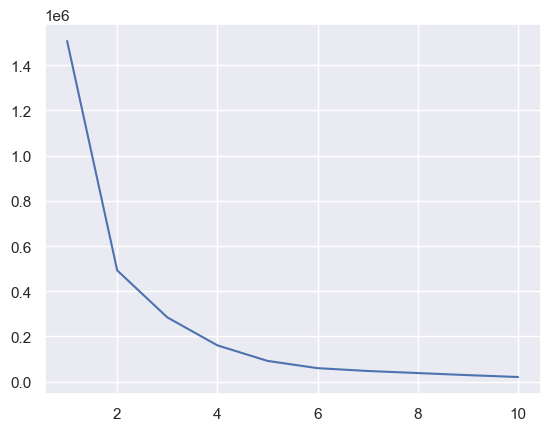

In [1505]:
inertia_scores22 = []

for i in range(1,11):
    kmeans22 = KMeans(n_clusters=i)
    kmeans22.fit(LowMiddle_Income_Cluster[['Purchased_Rate','TotalPurchasedItems']])
    inertia_scores22.append(kmeans22.inertia_)
plt.plot(range(1,11),inertia_scores22)

In [1506]:
clustering22.cluster_centers_

array([[3.90181237e-01, 8.42674419e+01],
       [2.10908923e+00, 4.55500000e+02],
       [1.67491211e-01, 3.61730769e+01],
       [1.00738629e+00, 2.17565217e+02]])

<AxesSubplot: xlabel='Income', ylabel='Purchased_Rate'>

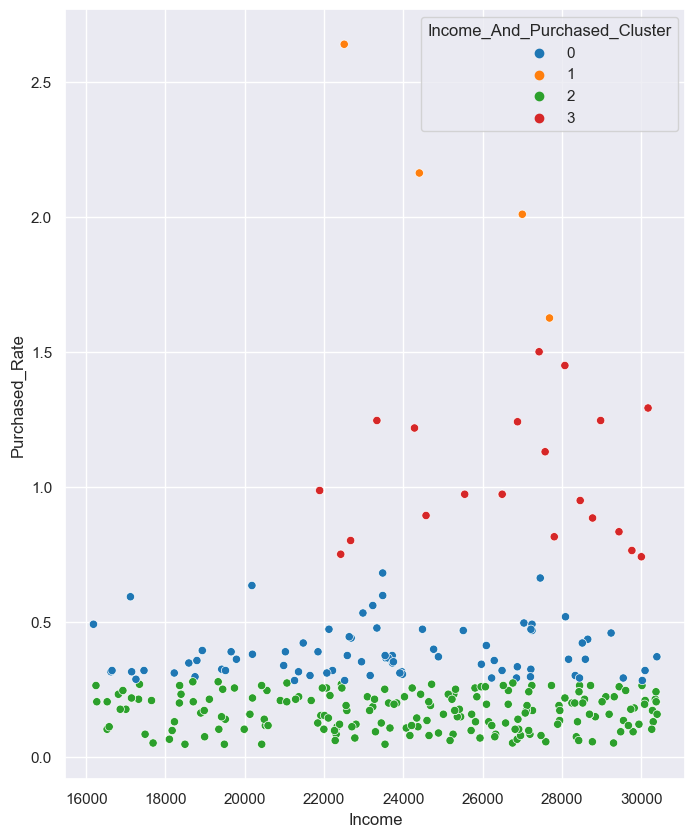

In [1507]:
plt.figure(figsize= (8,10))
sns.scatterplot(data=LowMiddle_Income_Cluster, x='Income', y='Purchased_Rate', hue='Income_And_Purchased_Cluster', palette='tab10')


Kita akan mengganti angka 0-3 menjadi :
- 0 = Bronze
- 3 = Silver
- 2 = Gold
- 1 = Platinum

In [1508]:
LowMiddle_Income_Cluster.Income_And_Purchased_Cluster.replace({   
    0 : 'Bronze',
    3 : 'Silver',
    2 : 'Gold',
    1 : 'Platinum',
}, inplace=True)

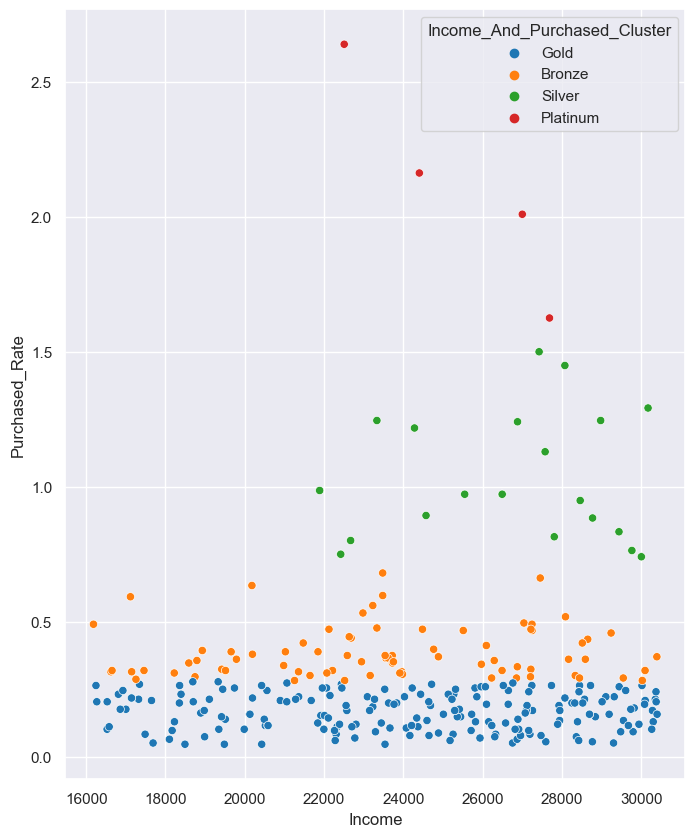

In [1509]:
plt.figure(figsize= (8,10))
sns.scatterplot(data=LowMiddle_Income_Cluster, x='Income', y='Purchased_Rate', hue='Income_And_Purchased_Cluster', palette='tab10')
plt.savefig('Clustering Low Middle Income.png')

### Clustering `Upper Middle Income`

In [1510]:
UpperMiddle_Income_Cluster = df[df['Income_Group'] == 'Upper Middle Income']
UpperMiddle_Income_Cluster.head()


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524  1957        Graduation  Single         58138.0  0        0          
1  2174  1954        Graduation  Single         46344.0  1        1          
2  4141  1965        Graduation  Couple         71613.0  0        0          
4  5324  1981        PhD         Couple         58293.0  1        0          
5  7446  1967        Master      Couple         62513.0  0        1          

  Dt_Customer  Recency  MntWines  ...  Complain  Response  Age    Age_Group  \
0 2012-04-09   58       635       ...  0         1         65   Old Adults    
1 2014-08-03   38       11        ...  0         0         68   Old Adults    
2 2013-08-21   26       426       ...  0         0         57   Middle Aged   
4 2014-01-19   94       173       ...  0         0         41   Middle Aged   
5 2013-09-09   16       520       ...  0         0         55   Middle Aged   

   TotalPurchasedItems         Income_Group  Family_Members  TotalChildren  \
0  1617                 Upper Middle Income  1               0               
1  27                   Upper Middle Income  3               2               
2  776                  Upper Middle Income  2               0               
4  422                  Upper Middle Income  3               1               
5  716                  Upper Middle Income  3               1               

   Year  Month  
0  2012  4      
1  2014  8      
2  2013  8      
4  2014  1      
5  2013  9      

[5 rows x 35 columns]

In [1511]:
UpperMiddle_Income_Cluster['Purchased_Rate'] = (UpperMiddle_Income_Cluster['TotalPurchasedItems']/UpperMiddle_Income_Cluster['TotalPurchasedItems'].sum())*100
UpperMiddle_Income_Cluster.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524  1957        Graduation  Single         58138.0  0        0          
1  2174  1954        Graduation  Single         46344.0  1        1          
2  4141  1965        Graduation  Couple         71613.0  0        0          
4  5324  1981        PhD         Couple         58293.0  1        0          
5  7446  1967        Master      Couple         62513.0  0        1          

  Dt_Customer  Recency  MntWines  ...  Response  Age    Age_Group  \
0 2012-04-09   58       635       ...  1         65   Old Adults    
1 2014-08-03   38       11        ...  0         68   Old Adults    
2 2013-08-21   26       426       ...  0         57   Middle Aged   
4 2014-01-19   94       173       ...  0         41   Middle Aged   
5 2013-09-09   16       520       ...  0         55   Middle Aged   

   TotalPurchasedItems         Income_Group  Family_Members  TotalChildren  \
0  1617                 Upper Middle Income  1               0               
1  27                   Upper Middle Income  3               2               
2  776                  Upper Middle Income  2               0               
4  422                  Upper Middle Income  3               1               
5  716                  Upper Middle Income  3               1               

   Year  Month  Purchased_Rate  
0  2012  4      0.200917        
1  2014  8      0.003355        
2  2013  8      0.096421        
4  2014  1      0.052435        
5  2013  9      0.088965        

[5 rows x 36 columns]

In [1512]:
clustering3 = KMeans(n_clusters=3)
clustering3.fit(UpperMiddle_Income_Cluster[['Purchased_Rate']])

KMeans(n_clusters=3)

In [1513]:
clustering3.labels_

array([1, 0, 2, ..., 1, 2, 0])

In [1514]:
UpperMiddle_Income_Cluster['Purchased_Total_Cluster'] = clustering3.labels_
UpperMiddle_Income_Cluster.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524  1957        Graduation  Single         58138.0  0        0          
1  2174  1954        Graduation  Single         46344.0  1        1          
2  4141  1965        Graduation  Couple         71613.0  0        0          
4  5324  1981        PhD         Couple         58293.0  1        0          
5  7446  1967        Master      Couple         62513.0  0        1          

  Dt_Customer  Recency  MntWines  ...  Age    Age_Group  TotalPurchasedItems  \
0 2012-04-09   58       635       ...  65   Old Adults   1617                  
1 2014-08-03   38       11        ...  68   Old Adults   27                    
2 2013-08-21   26       426       ...  57   Middle Aged  776                   
4 2014-01-19   94       173       ...  41   Middle Aged  422                   
5 2013-09-09   16       520       ...  55   Middle Aged  716                   

          Income_Group  Family_Members  TotalChildren  Year  Month  \
0  Upper Middle Income  1               0              2012  4       
1  Upper Middle Income  3               2              2014  8       
2  Upper Middle Income  2               0              2013  8       
4  Upper Middle Income  3               1              2014  1       
5  Upper Middle Income  3               1              2013  9       

   Purchased_Rate  Purchased_Total_Cluster  
0  0.200917        1                        
1  0.003355        0                        
2  0.096421        2                        
4  0.052435        0                        
5  0.088965        2                        

[5 rows x 37 columns]

In [1515]:
UpperMiddle_Income_Cluster['Purchased_Total_Cluster'].value_counts()

0    822
2    420
1    225
Name: Purchased_Total_Cluster, dtype: int64

In [1516]:
clustering3.inertia_

0.702342703899046

In [1517]:
inertia_scores3 = []

for i in range(1,11):
    kmeans3 = KMeans(n_clusters=i)
    kmeans3.fit(UpperMiddle_Income_Cluster[['Income']])
    inertia_scores3.append(kmeans3.inertia_)


In [1518]:
inertia_scores3

[241732800046.25494,
 57672849706.75875,
 25709822707.42329,
 14741140198.633911,
 9439349013.083076,
 6472913699.8687105,
 4863284030.376161,
 3723494148.1831303,
 2910336135.3350463,
 2346638838.995036]

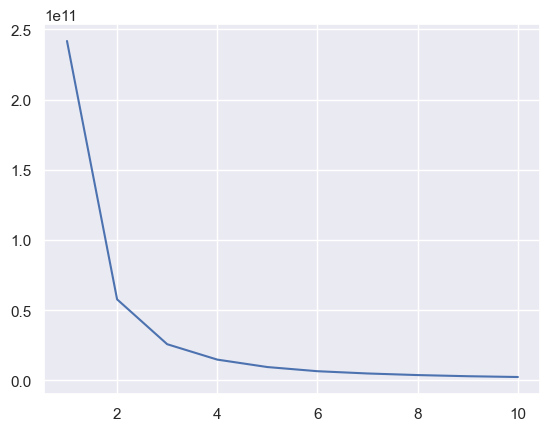

In [1519]:
plt.plot(range(1,11),inertia_scores3)

In [1520]:
UpperMiddle_Income_Cluster.groupby('Purchased_Total_Cluster')['Income', 'TotalPurchasedItems','Purchased_Rate'].mean()

Income  TotalPurchasedItems  Purchased_Rate
Purchased_Total_Cluster                                                   
0                        43922.576642  176.785888           0.021966      
1                        67130.528889  1439.231111          0.178829      
2                        60190.140476  799.197619           0.099303

In [1521]:
clustering33 = KMeans(n_clusters=4)
clustering33.fit(UpperMiddle_Income_Cluster[['Purchased_Rate','TotalPurchasedItems']])
UpperMiddle_Income_Cluster['Income_And_Purchased_Cluster'] = clustering33.labels_

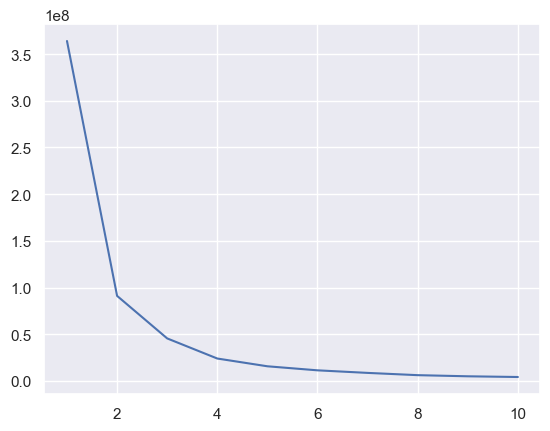

In [1522]:
inertia_scores33 = []

for i in range(1,11):
    kmeans33 = KMeans(n_clusters=i)
    kmeans33.fit(UpperMiddle_Income_Cluster[['Purchased_Rate','TotalPurchasedItems']])
    inertia_scores33.append(kmeans33.inertia_)
plt.plot(range(1,11),inertia_scores33)

In [1523]:
clustering33.cluster_centers_

array([[1.38952298e-02, 1.11829921e+02],
       [1.25187805e-01, 1.00752147e+03],
       [1.97028091e-01, 1.58569784e+03],
       [6.26114436e-02, 5.03901907e+02]])

<AxesSubplot: xlabel='Income', ylabel='Purchased_Rate'>

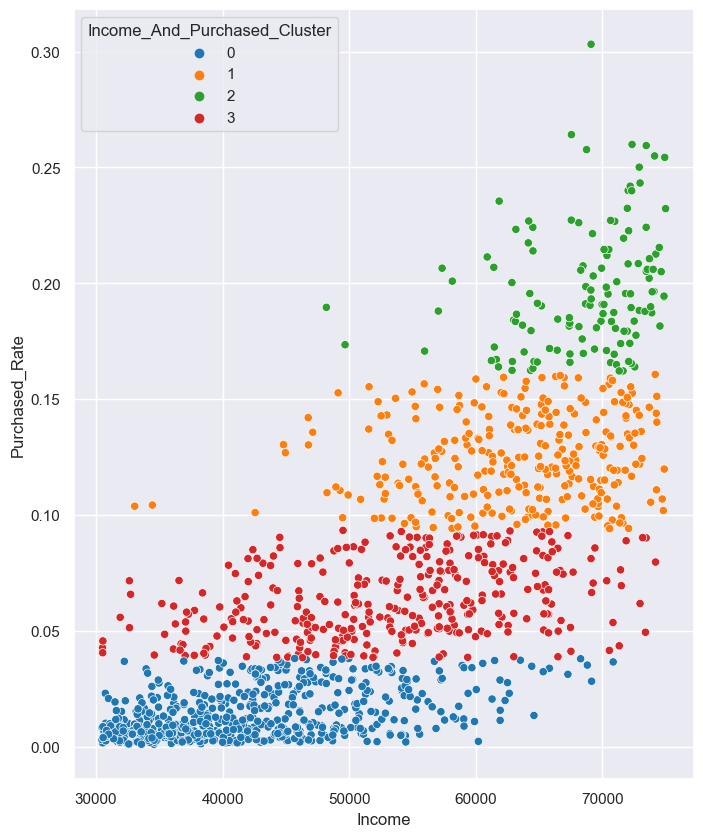

In [1524]:
plt.figure(figsize= (8,10))
sns.scatterplot(data=UpperMiddle_Income_Cluster, x='Income', y='Purchased_Rate', hue='Income_And_Purchased_Cluster', palette='tab10')


Kita akan mengganti angka 0-3 menjadi :
- 0 = Gold
- 3 = Platinum
- 2 = Silver
- 1 = Bronze

In [1525]:
UpperMiddle_Income_Cluster.Income_And_Purchased_Cluster.replace({   
    0 : 'Gold',
    3 : 'Platinum',
    2 : 'Silver',
    1 : 'Bronze',
}, inplace=True)

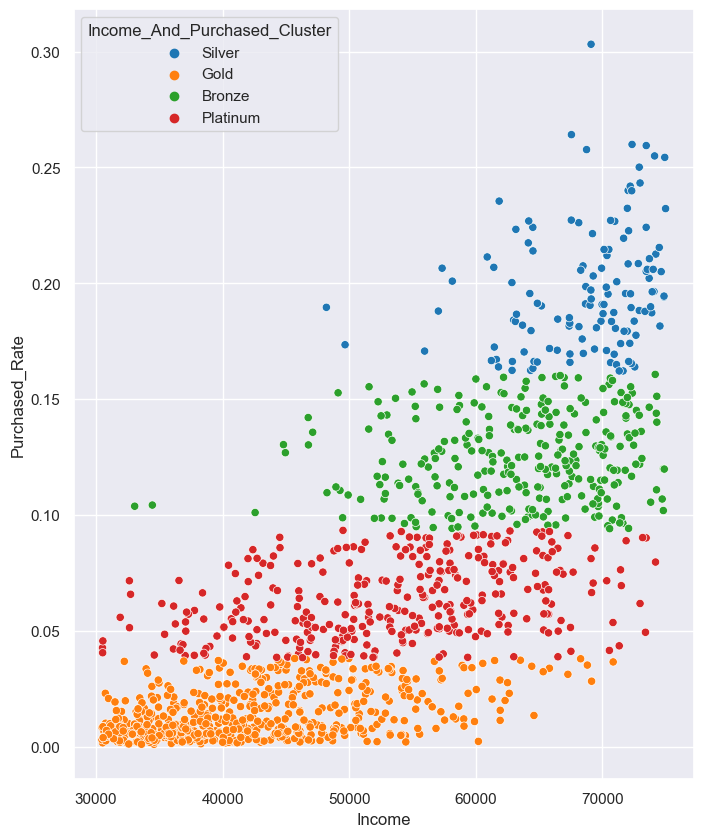

In [1526]:
plt.figure(figsize= (8,10))
sns.scatterplot(data=UpperMiddle_Income_Cluster, x='Income', y='Purchased_Rate', hue='Income_And_Purchased_Cluster', palette='tab10')
plt.savefig('Clustering Upper Middle Income.png')

### Clustering `High Income`

In [1527]:
High_Income_Cluster = df[df['Income_Group'] == 'High Income']
High_Income_Cluster.head()


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
15  2114  1946        PhD         Single         82800.0  0        0          
18  6565  1949        Master      Couple         76995.0  0        1          
29  1966  1965        PhD         Couple         84618.0  0        0          
40  8601  1980        Graduation  Couple         80011.0  0        1          
45  1371  1976        Graduation  Single         79941.0  0        0          

   Dt_Customer  Recency  MntWines  ...  Complain  Response  Age    Age_Group  \
15 2012-11-24   23       1006      ...  0         1         76   Old Adults    
18 2013-03-28   91       1012      ...  0         0         73   Old Adults    
29 2013-11-22   96       684       ...  0         0         57   Middle Aged   
40 2013-04-29   3        421       ...  0         0         42   Middle Aged   
45 2014-06-28   72       123       ...  0         0         46   Middle Aged   

    TotalPurchasedItems  Income_Group  Family_Members  TotalChildren  Year  \
15  1315                 High Income   1               0              2012   
18  1782                 High Income   3               1              2013   
29  1672                 High Income   2               0              2013   
40  1395                 High Income   3               1              2013   
45  984                  High Income   1               0              2014   

    Month  
15  11     
18  3      
29  11     
40  4      
45  6      

[5 rows x 35 columns]

In [1528]:
High_Income_Cluster['Purchased_Rate'] = (High_Income_Cluster['TotalPurchasedItems']/High_Income_Cluster['TotalPurchasedItems'].sum())*100
High_Income_Cluster.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
15  2114  1946        PhD         Single         82800.0  0        0          
18  6565  1949        Master      Couple         76995.0  0        1          
29  1966  1965        PhD         Couple         84618.0  0        0          
40  8601  1980        Graduation  Couple         80011.0  0        1          
45  1371  1976        Graduation  Single         79941.0  0        0          

   Dt_Customer  Recency  MntWines  ...  Response  Age    Age_Group  \
15 2012-11-24   23       1006      ...  1         76   Old Adults    
18 2013-03-28   91       1012      ...  0         73   Old Adults    
29 2013-11-22   96       684       ...  0         57   Middle Aged   
40 2013-04-29   3        421       ...  0         42   Middle Aged   
45 2014-06-28   72       123       ...  0         46   Middle Aged   

    TotalPurchasedItems  Income_Group  Family_Members  TotalChildren  Year  \
15  1315                 High Income   1               0              2012   
18  1782                 High Income   3               1              2013   
29  1672                 High Income   2               0              2013   
40  1395                 High Income   3               1              2013   
45  984                  High Income   1               0              2014   

    Month  Purchased_Rate  
15  11     0.257493        
18  3      0.348938        
29  11     0.327398        
40  4      0.273158        
45  6      0.192679        

[5 rows x 36 columns]

In [1529]:
clustering4 = KMeans(n_clusters=3)
clustering4.fit(High_Income_Cluster[['Purchased_Rate']])

KMeans(n_clusters=3)

In [1530]:
clustering4.labels_

array([2, 1, 2, 2, 0, 2, 2, 1, 2, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       1, 0, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 0, 0, 2, 1, 2, 0, 2, 2, 0, 0, 1, 2, 0, 2, 0, 0, 2, 2, 2, 2,
       1, 1, 0, 2, 0, 2, 1, 2, 2, 0, 0, 1, 2, 1, 0, 1, 1, 1, 2, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 0, 0, 2, 2, 2, 2, 1, 2, 0, 1, 0, 0, 2, 1, 2, 2,
       0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 1, 2, 0, 2, 0, 2, 0, 0, 2, 1,
       1, 2, 2, 2, 2, 0, 1, 1, 0, 2, 2, 1, 1, 0, 2, 0, 2, 2, 2, 2, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 2, 1, 1, 2, 1, 2, 0, 1, 2, 1, 1,
       2, 0, 0, 2, 1, 2, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0, 1, 2, 1, 2, 1, 2,
       0, 0, 0, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 0, 1,
       2, 2, 0, 2, 0, 2, 2, 1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 1, 2, 0, 0,
       2, 1, 1, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 2, 2, 1,
       0, 2, 2, 2, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2, 2, 0, 0, 0, 2, 1, 0,
       0, 0, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 2, 2,

In [1531]:
High_Income_Cluster['Purchased_Total_Cluster'] = clustering4.labels_
High_Income_Cluster.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
15  2114  1946        PhD         Single         82800.0  0        0          
18  6565  1949        Master      Couple         76995.0  0        1          
29  1966  1965        PhD         Couple         84618.0  0        0          
40  8601  1980        Graduation  Couple         80011.0  0        1          
45  1371  1976        Graduation  Single         79941.0  0        0          

   Dt_Customer  Recency  MntWines  ...  Age    Age_Group  TotalPurchasedItems  \
15 2012-11-24   23       1006      ...  76   Old Adults   1315                  
18 2013-03-28   91       1012      ...  73   Old Adults   1782                  
29 2013-11-22   96       684       ...  57   Middle Aged  1672                  
40 2013-04-29   3        421       ...  42   Middle Aged  1395                  
45 2014-06-28   72       123       ...  46   Middle Aged  984                   

    Income_Group  Family_Members  TotalChildren  Year  Month  Purchased_Rate  \
15  High Income   1               0              2012  11     0.257493         
18  High Income   3               1              2013  3      0.348938         
29  High Income   2               0              2013  11     0.327398         
40  High Income   3               1              2013  4      0.273158         
45  High Income   1               0              2014  6      0.192679         

    Purchased_Total_Cluster  
15  2                        
18  1                        
29  2                        
40  2                        
45  0                        

[5 rows x 37 columns]

In [1532]:
High_Income_Cluster['Purchased_Total_Cluster'].value_counts()

2    147
0    120
1    90 
Name: Purchased_Total_Cluster, dtype: int64

In [1533]:
clustering4.inertia_

0.5457855321672661

In [1534]:
inertia_scores4 = []

for i in range(1,11):
    kmeans4 = KMeans(n_clusters=i)
    kmeans4.fit(High_Income_Cluster[['Income']])
    inertia_scores4.append(kmeans4.inertia_)


In [1535]:
inertia_scores4

[51802064750.30812,
 12575415585.797142,
 4299745785.822742,
 2269341319.5374155,
 1453726456.0372064,
 879543727.4714582,
 691709371.7908046,
 509787916.5924669,
 397712488.0965781,
 305703811.4473907]

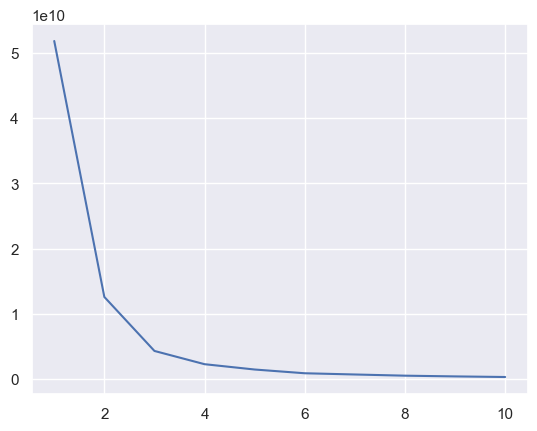

In [1536]:
plt.plot(range(1,11),inertia_scores4)

In [1537]:
High_Income_Cluster.groupby('Purchased_Total_Cluster')['Income', 'TotalPurchasedItems','Purchased_Rate'].mean()

Income  TotalPurchasedItems  Purchased_Rate
Purchased_Total_Cluster                                                   
0                        83396.400000  927.816667           0.181678      
1                        84618.700000  2014.622222          0.394488      
2                        83878.965986  1483.258503          0.290440

In [1538]:
clustering44 = KMeans(n_clusters=4)
clustering44.fit(High_Income_Cluster[['Purchased_Rate','TotalPurchasedItems']])
High_Income_Cluster['Income_And_Purchased_Cluster'] = clustering44.labels_

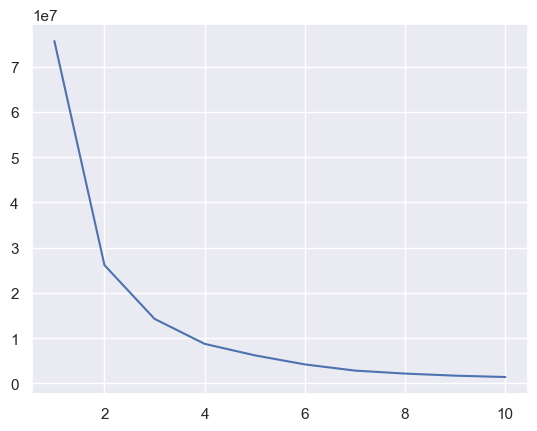

In [1539]:
inertia_scores44 = []

for i in range(1,11):
    kmeans44 = KMeans(n_clusters=i)
    kmeans44.fit(High_Income_Cluster[['Purchased_Rate','TotalPurchasedItems']])
    inertia_scores44.append(kmeans44.inertia_)
plt.plot(range(1,11),inertia_scores44)

In [1540]:
clustering44.cluster_centers_

array([[1.40452879e-01, 7.17283019e+02],
       [3.15719452e-01, 1.61235714e+03],
       [4.05377812e-01, 2.07023611e+03],
       [2.33401802e-01, 1.19196667e+03]])

<AxesSubplot: xlabel='Income', ylabel='Purchased_Rate'>

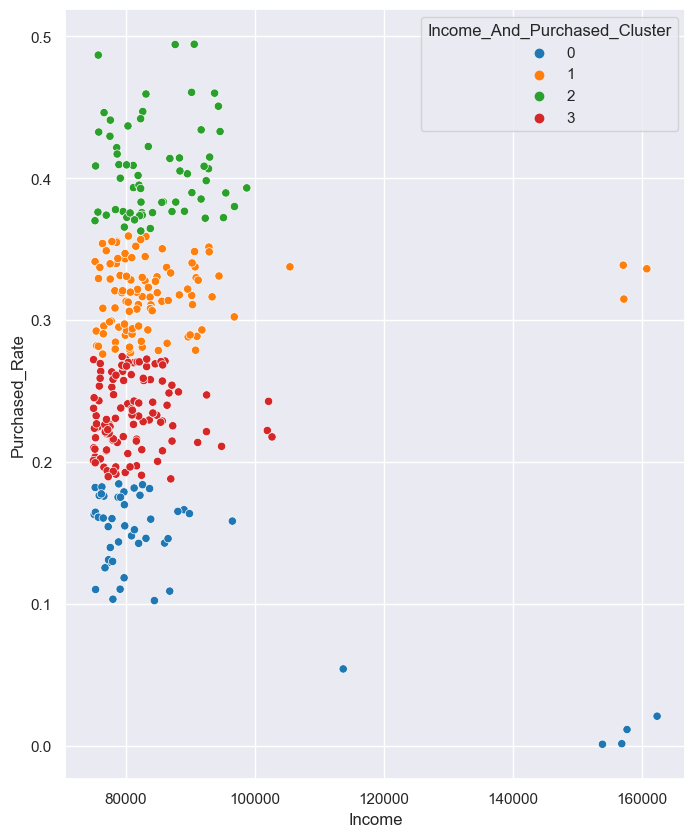

In [1541]:
plt.figure(figsize= (8,10))
sns.scatterplot(data=High_Income_Cluster, x='Income', y='Purchased_Rate', hue='Income_And_Purchased_Cluster', palette='tab10')

Kita akan mengganti angka 0-3 menjadi :
- 0 = Platinum
- 3 = Bronze
- 2 = Gold
- 1 = Silver

In [1542]:
High_Income_Cluster.Income_And_Purchased_Cluster.replace({   
    0 : 'Platinum',
    3 : 'Bronze',
    2 : 'Gold',
    1 : 'Silver',
}, inplace=True)

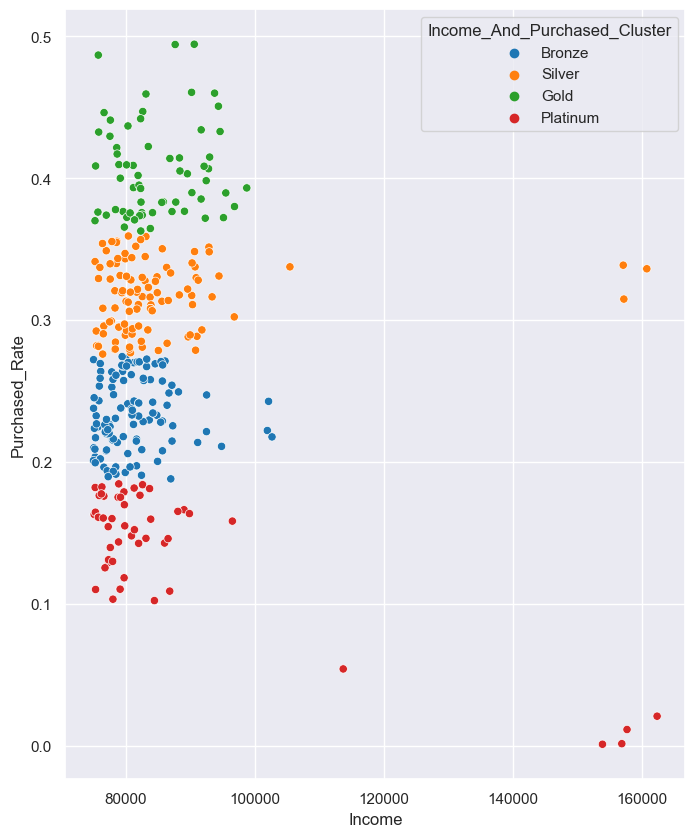

In [1543]:
plt.figure(figsize= (8,10))
sns.scatterplot(data=High_Income_Cluster, x='Income', y='Purchased_Rate', hue='Income_And_Purchased_Cluster', palette='tab10')
plt.savefig('Clustering High Income.png')

Setelah selesai membuat clustering (`Income_And_Purchase_Cluster`) berdasarkan `Income` dan `TotalPurchasedItems` menggunakan KMeans, kita akan menggabungkan seluruh pecahan dataframe menjadi dataframe baru dan kemudian dilakukan analisis untuk melihat bagaimana respon `Income_And_Purchase_Cluster` terhadap keseluruhan campaign, dan akan menjawab beberapa pertanyaan sebagai berikut:
- Badge / `Income_And_Purchase_Cluster` mana yang paling banyak menerima tawaran diskon selama campaign.
- Apakah ada perbedaan kelompok Badge / `Income_And_Purchase_Cluster` dalam merespon campaign

In [1544]:
# Concat semua columns
final_dataframe = pd.concat([Low_Income_Cluster, LowMiddle_Income_Cluster,UpperMiddle_Income_Cluster, High_Income_Cluster], axis=0)



In [1545]:
final_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 9 to 2221
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            2212 non-null   int64         
 1   Year_Birth                    2212 non-null   int64         
 2   Education                     2212 non-null   object        
 3   Marital_Status                2212 non-null   object        
 4   Income                        2212 non-null   float64       
 5   Kidhome                       2212 non-null   int64         
 6   Teenhome                      2212 non-null   int64         
 7   Dt_Customer                   2212 non-null   datetime64[ns]
 8   Recency                       2212 non-null   int64         
 9   MntWines                      2212 non-null   int64         
 10  MntFruits                     2212 non-null   int64         
 11  MntMeatProducts               

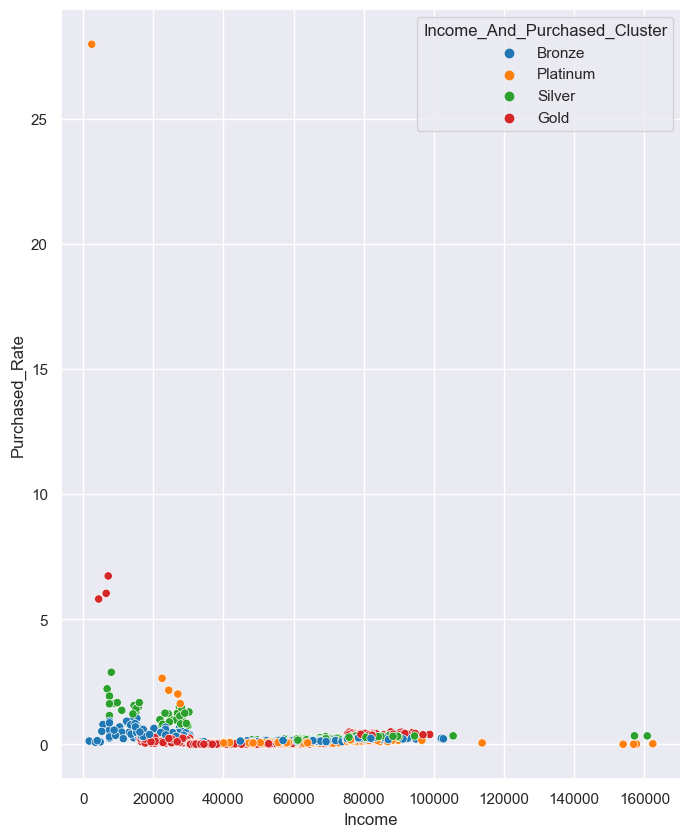

In [1546]:
plt.figure(figsize= (8,10))
sns.scatterplot(data=final_dataframe, x='Income', y='Purchased_Rate', hue='Income_And_Purchased_Cluster', palette='tab10')
plt.savefig('Clustering Final Data Frame.png')

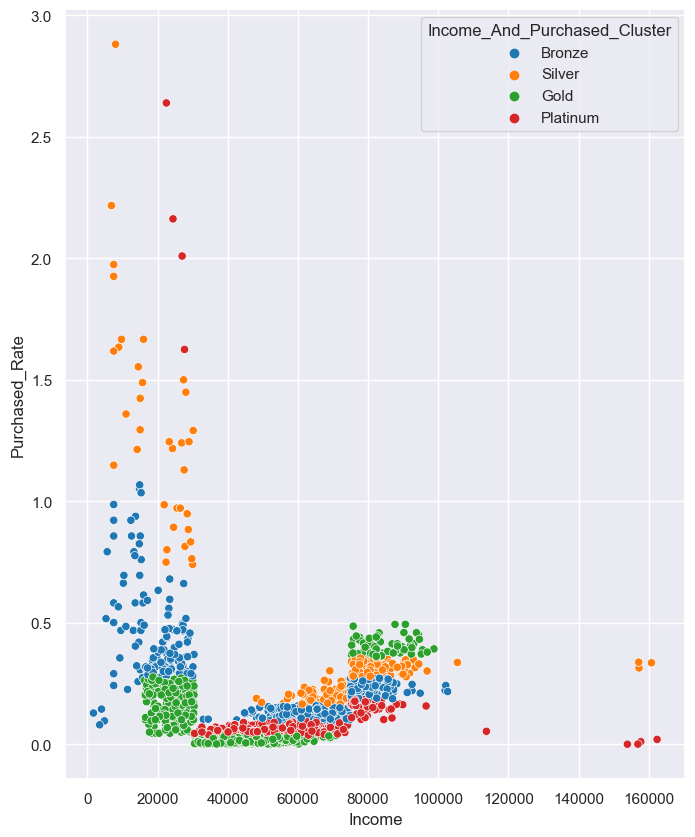

In [1547]:
final_dataframe2 = final_dataframe[final_dataframe['Purchased_Rate'] <= 5]

plt.figure(figsize= (8,10))
sns.scatterplot(data=final_dataframe2, x='Income', y='Purchased_Rate', hue='Income_And_Purchased_Cluster', palette='tab10')
plt.savefig('Clustering Final DataFrame kurang dari 5.png')


In [1548]:
fig=px.sunburst(final_dataframe,path=['Income_And_Purchased_Cluster','AcceptedCmp1'],color='AcceptedCmp1', title=f'Proporsi Menerima Tawaran Campaign Pertama Berdasarkan Badge')
fig.show(figsize=(5, 5))

In [1549]:
fig=px.sunburst(final_dataframe,path=['Income_And_Purchased_Cluster','AcceptedCmp2'],color='AcceptedCmp2', title=f'Proporsi Menerima Tawaran Campaign Kedua Berdasarkan Badge')
fig.show(figsize=(5, 5))

In [1550]:
fig=px.sunburst(final_dataframe,path=['Income_And_Purchased_Cluster','AcceptedCmp3'],color='AcceptedCmp3', title=f'Proporsi Menerima Tawaran Campaign Ketiga Berdasarkan Badge')
fig.show(figsize=(3, 2))

In [1551]:
fig=px.sunburst(final_dataframe,path=['Income_And_Purchased_Cluster','AcceptedCmp4'],color='AcceptedCmp4', title=f'Proporsi Menerima Tawaran Campaign Keempat Berdasarkan Badge')
fig.show(figsize=(3, 2))

In [1552]:
fig=px.sunburst(final_dataframe,path=['Income_And_Purchased_Cluster','AcceptedCmp5'],color='AcceptedCmp5', title=f'Proporsi Menerima Tawaran Campaign Kelima Berdasarkan Badge')
fig.show(figsize=(3, 2))

In [1553]:
fig=px.sunburst(final_dataframe,path=['Income_And_Purchased_Cluster','Response'],color='Response', title=f'Proporsi Menerima Tawaran Campaign Terakhir Berdasarkan Badge')
fig.show(figsize=(3, 2))

In [1554]:
final_dataframe_Badge = final_dataframe.pivot_table(index = 'Income_And_Purchased_Cluster',
                        values= ('AcceptedCmp1', 
                                  'AcceptedCmp2', 
                                  'AcceptedCmp3', 
                                  'AcceptedCmp4', 
                                  'AcceptedCmp5', 
                                  'Response'),
                        aggfunc= ('sum')
                        )
final_dataframe_Badge

AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  \
Income_And_Purchased_Cluster                                             
Bronze                        39            11            45             
Gold                          35            6             66             
Platinum                      18            3             26             
Silver                        50            10            26             

                              AcceptedCmp4  AcceptedCmp5  Response  
Income_And_Purchased_Cluster                                        
Bronze                        49            35            89        
Gold                          32            46            103       
Platinum                      40            9             54        
Silver                        43            71            87

In [1555]:
score, pval, dof,exp=chi2_contingency(final_dataframe_Badge)
if pval<=0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Tolak Ho


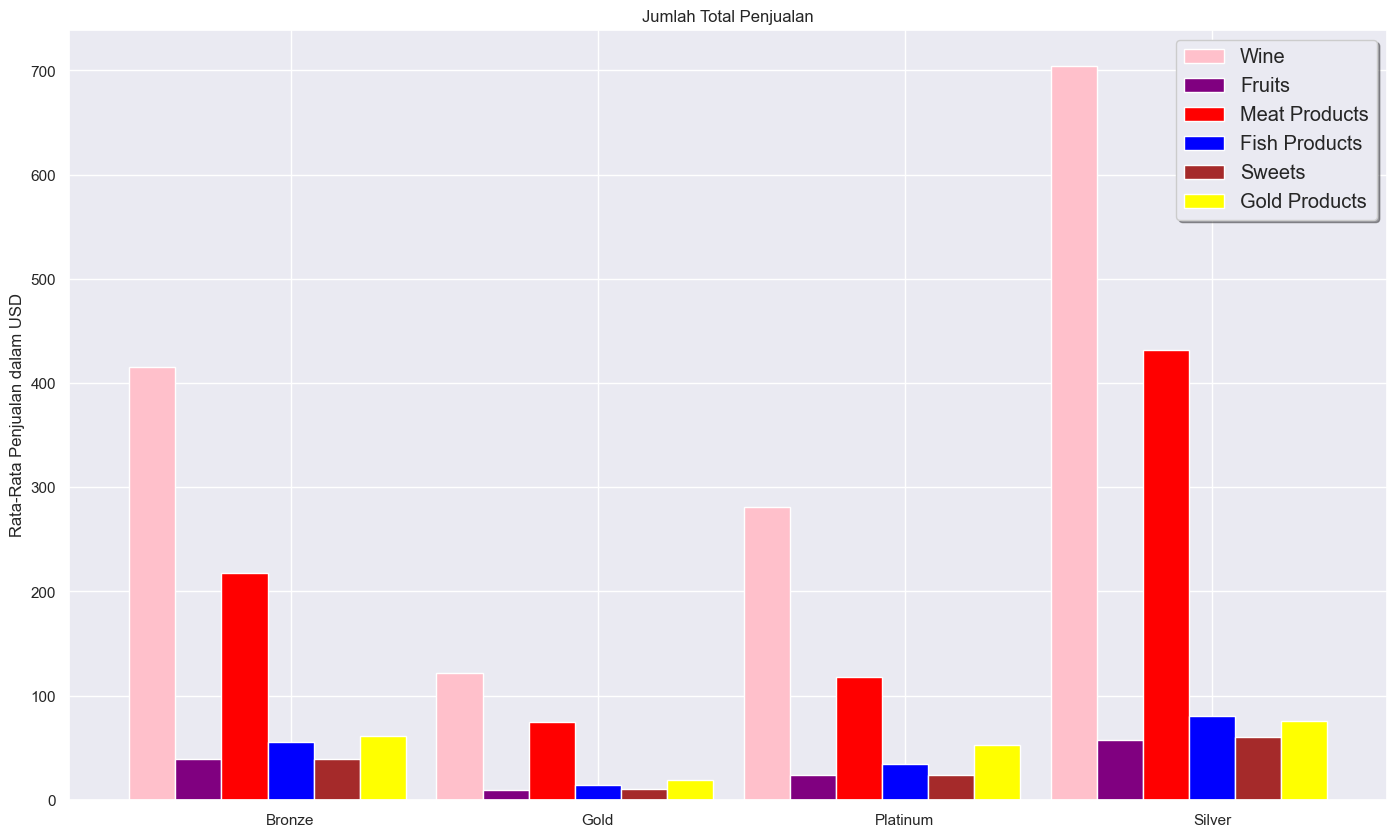

In [1556]:
label=final_dataframe.groupby('Income_And_Purchased_Cluster').count()['ID'].index
label

fish_spent=final_dataframe.groupby('Income_And_Purchased_Cluster').mean()['MntFishProducts']
fruit_spent=final_dataframe.groupby('Income_And_Purchased_Cluster').mean()['MntFruits']
gold_spent=final_dataframe.groupby('Income_And_Purchased_Cluster').mean()['MntGoldProds']
meat_spent=final_dataframe.groupby('Income_And_Purchased_Cluster').mean()['MntMeatProducts']
sweet_spent=final_dataframe.groupby('Income_And_Purchased_Cluster').mean()['MntSweetProducts']
wine_spent=final_dataframe.groupby('Income_And_Purchased_Cluster').mean()['MntWines']

xpos=np.arange(len(label))
xpos



plt.figure(figsize=(17,10))
plt.bar(xpos-0.45,wine_spent,width=0.15,label='Wine',color='pink')
plt.bar(xpos-0.3,fruit_spent,width=0.15,label='Fruits',color='purple')
plt.bar(xpos-0.15,meat_spent,width=0.15,label='Meat Products',color='red')
plt.bar(xpos,fish_spent,width=0.15,label='Fish Products',color='blue')
plt.bar(xpos+0.15,sweet_spent,width=0.15,label='Sweets',color='brown')
plt.bar(xpos+0.3,gold_spent,width=0.15,label='Gold Products',color='yellow')

plt.xticks(xpos,label)
plt.ylabel('Rata-Rata Penjualan dalam USD')
plt.title('Jumlah Total Penjualan')
plt.legend(loc='best',shadow=True,fontsize='large')

Mayoritas dari pelanggan makertplace X apabila dilihat dari Badge adalah yang memiliki kategori Badge `Gold`. Namun, meskipun demikian, **pelanggan yang memiliki Badge `Gold` memiliki ketertarikan terhadap campaign pertama hingga terakhir cenderung lebih rendah dibanding lainnya, sedangkan yang memiliki ketertarikan paling tinggi adalah pelanggan yang memiliki kategori Badge `Silver`**. Dari hasil uji menggunakan *chi square* mengkonfirmasi kategori badge memiliki pengaruh terhadap ketertarikan pelanggan terhadap campaign.

## **Kesimpulan** 

Dilihat dari analisis yang dilakukan apabila maka dapat dibuat kesimpulan bahwa karakteristik yang lebih cenderung menerima tawaran dari campaign adalah sebeagai berikut:
- Apabila dilihat dari kategori umur, maka pelanggan dengan kategori `Young Adult` cenderung lebih tertarik dengan tawaran campaign.
- Apabila dilihat dari statu pernikahan dan jumlah anak yang dimiliki, pelanggan yang memiliki ketertarikan terhadap campaign lebih tinggi adalah pelanggan yang memiliki status pernikahan `Single`, sedangkan dilihat dari jumlah anak, pelanggan yang `tidak memiliki anak` memiliki ketertarikan lebih terhadap tawaran campaign.
- Apabila dilihat dari kelompok Income, pelanggan yang memiliki ketertarikan paling tinggi terhadap campaign adalah kelompok `Upper Middle Income`, dan ada kecenderungan bahwa semakin tinggi income, semakin tinggu juga ketertarikan terhadap tawaran campaign.
- Transaksi yang dilakukan lebih banyak dilakukan di Store (`NumStorePurchases`)
- Performa pelanggan yang menggunakan diskon relatif menurun dari di tahun 2014, sedangkan tertinggi dan stabil ada pada tahun 2013.
- Setelah dilakukan clustering. pelanggan yang memliki cluster `Silver` cenderung memiliki ketertarikan yang lebih tinggi dibandingkan lainnya terhadap tawaran dari campaign. 

## **Rekomendasi**
1. Untuk meningkatkan penjualan pelanggan dan meningkatkan kunjungan pada website, bisa dibuat semacam **poin kunjungan** yang nantinya dapat diubah atau ditukar untuk program diskon ongkos kirim atau diskon barang.
2. Untuk memaksimalkan penjualan berdasarkan kategori produk, mungkin dapat diberikan **diskon** bagi barang-barang yang memiliki presentasi penjualan terendah seperti **produk sweets dan juga buah**.
3. Untuk meningkatkan semangat pelanggan dalam berbelanja, diberikan **poin setiap pembelian barang**. Poin yang diperoleh setiap kali membeli barang dapat digunakan untuk meningkatkan performa dari Badge, dimana nantinya setiap tinggi badge yang dimikili, semakin besar juga tawaran diskon yang dimiliki, atau semakin banyak kesempatan untuk gratis ongkir. 






In [1558]:
final = final_dataframe.to_excel('Marketing_Campaign_AfterAnalysis.xlsx')